# BINA Case Studiy - FS22

## Bike Sharing Economie als zukunftssicherer Markt in der Stadt von Morgen

Um in Zukunft die Co2 Bilanz der Metropolen gegen Null zu reduzieren, wird auf das Zwei-rad gesetzt und laufend in der Erweiterung der Infrastruktur mit eingeplant. So gehört die Mobilität der Zukunft innerhalb der Städte dem Fahrrad. Die Verwendung von Fahrrädern als Mittel zum Pendeln, insbesondere für kurze Strecken, ist keine neue Idee. In den letz-ten Jahren hat das Fahrradfahren im Hinblick auf die Gesundheit im Besonderen während der Corona-Zeit sowie dem Bewusstsein des Klimawandels an Bedeutung gewonnen. An-statt ein Fahrrad zu kaufen und zu unterhalten, leihen immer mehr Bürger Fahrräder aus, damit sie es bei Bedarf dort nutzen können, wo sie es gerade benötigen. Aus diesem Grund bekommt der Sharing Economy Markt immer einen grösseren Stellenwert. So schaffen diese beiden Trends einen grossen Markt, der gesättigt werden soll. Aus diesem Grund möchten wir einen Datensatz von Leihfahrrädern in einer Europäi-schen/amerikanischen Stadt analysieren und Prognosen zur Nutzung darstellen.

### Studierende
- Yannik Wiederkehr
- Nicolas Feuchter
- Christian Heusser
- Stefan Ilic

### Fragestellungen
- Welches Nutzungsmuster kann aus dem Datensatz der ausgeliehenen Fahrräder in den Jahren X bis Y bestimmt werden.
- Hat das Wetter (Temperatur, Windgeschwindigkeit, Regen, etc.) einen Einfluss auf die Nutzung des Fahrrad-Leihsystems
- Ist es möglich ein stündliches Ausleihungsmodell zu bestimmen
- An welchen Wochentagen ist die Nachfrage besonders hoch
- Zu welchen Jahreszeiten wird das Ausleihsystem besonders genutzt
- Vorgehensmodell bestimmen beispielsweise Lineare Regression, Zeitreihenanaly-se, Regression Trees und Random Forest

### Dataset
**Dataset name:** London bike sharing dataset
**Source:** Kaggle [London bike sharing dataset](https://cycling.data.tfl.gov.uk)

#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**weather_code" category description:**

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog




## Packete und Bibliotheken installieren

In [1]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'



In [2]:
install.packages("ggplot2")


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



In [3]:
library(tidyverse)
library(purrr)
library(RColorBrewer)
library(scales)
library(readr)
library(tidyr)
library(dplyr)
library(corrplot)
library(dplyr)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor

corrplot 0.92 loaded


### Notwendige Libraries laden

### Datenset Bike Sharing laden und unter der Variable "bike_data" abspeichern

In [4]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")

### Datenset anzeigen

In [5]:
bike_data

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,04.01.2015,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,04.01.2015,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,04.01.2015,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,04.01.2015,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,04.01.2015,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,04.01.2015,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3
7,04.01.2015,06:00:00,6,Sonntag,1,51,1.0,-1.0,100.0,7.0,4,0,1,3
8,04.01.2015,07:00:00,7,Sonntag,1,75,1.0,-1.0,100.0,7.0,4,0,1,3
9,04.01.2015,08:00:00,8,Sonntag,1,131,1.5,-1.0,96.5,8.0,4,0,1,3
10,04.01.2015,09:00:00,9,Sonntag,1,301,2.0,-0.5,100.0,9.0,3,0,1,3


### Datentypen anzeigen

In [6]:
str(bike_data)

'data.frame':	17414 obs. of  15 variables:
 $ instant     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ date        : Factor w/ 730 levels "01.01.2016","01.01.2017",..: 72 72 72 72 72 72 72 72 72 72 ...
 $ time        : Factor w/ 24 levels "00:00:00","01:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hr          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ weekdays    : Factor w/ 7 levels "Dienstag","Donnerstag",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ month       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ cnt         : int  182 138 134 72 47 46 51 75 131 301 ...
 $ t1          : num  3 3 2.5 2 2 2 1 1 1.5 2 ...
 $ t2          : num  2 2.5 2.5 2 0 2 -1 -1 -1 -0.5 ...
 $ hum         : num  93 93 96.5 100 93 93 100 100 96.5 100 ...
 $ wind_speed  : num  6 5 0 0 6.5 4 7 7 8 9 ...
 $ weather_code: int  3 1 1 1 1 1 4 4 4 3 ...
 $ is_holiday  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ is_weekend  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ season      : int  3 3 3 3 3 3 3 3 3 3 ...


### Zusammenfassung des Datensets anzeigen

In [7]:
summary(bike_data)

    instant              date             time             hr       
 Min.   :    1   01.01.2016:   24   16:00:00:  730   Min.   : 0.00  
 1st Qu.: 4354   01.01.2017:   24   12:00:00:  729   1st Qu.: 6.00  
 Median : 8708   01.02.2015:   24   15:00:00:  729   Median :12.00  
 Mean   : 8708   01.02.2016:   24   13:00:00:  728   Mean   :11.51  
 3rd Qu.:13061   01.03.2015:   24   14:00:00:  728   3rd Qu.:18.00  
 Max.   :17414   01.03.2016:   24   17:00:00:  728   Max.   :23.00  
                 (Other)   :17270   (Other) :13042                  
       weekdays        month             cnt             t1       
 Dienstag  :2505   Min.   : 1.000   Min.   :   0   Min.   :-1.50  
 Donnerstag:2492   1st Qu.: 4.000   1st Qu.: 257   1st Qu.: 8.00  
 Freitag   :2450   Median : 7.000   Median : 844   Median :12.50  
 Mittwoch  :2489   Mean   : 6.515   Mean   :1143   Mean   :12.47  
 Montag    :2508   3rd Qu.:10.000   3rd Qu.:1672   3rd Qu.:16.00  
 Samstag   :2465   Max.   :12.000   Max.   :78

### Erklärung zu summary(bike_data)

In der Zusammenfassung werden pro Spalte der kleinste Wert, das erste Quartil, der Median, Mittelwert, das dritte Quartil und der Maximalwert angezeigt. Diese Zusammenfassung hilf, einen ersten Überblick über die Daten und die Werte zu erhalten.

## Vergangenheitsanalyse

### Boxplot Anzahl Ausleihen nach Tageszeit

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


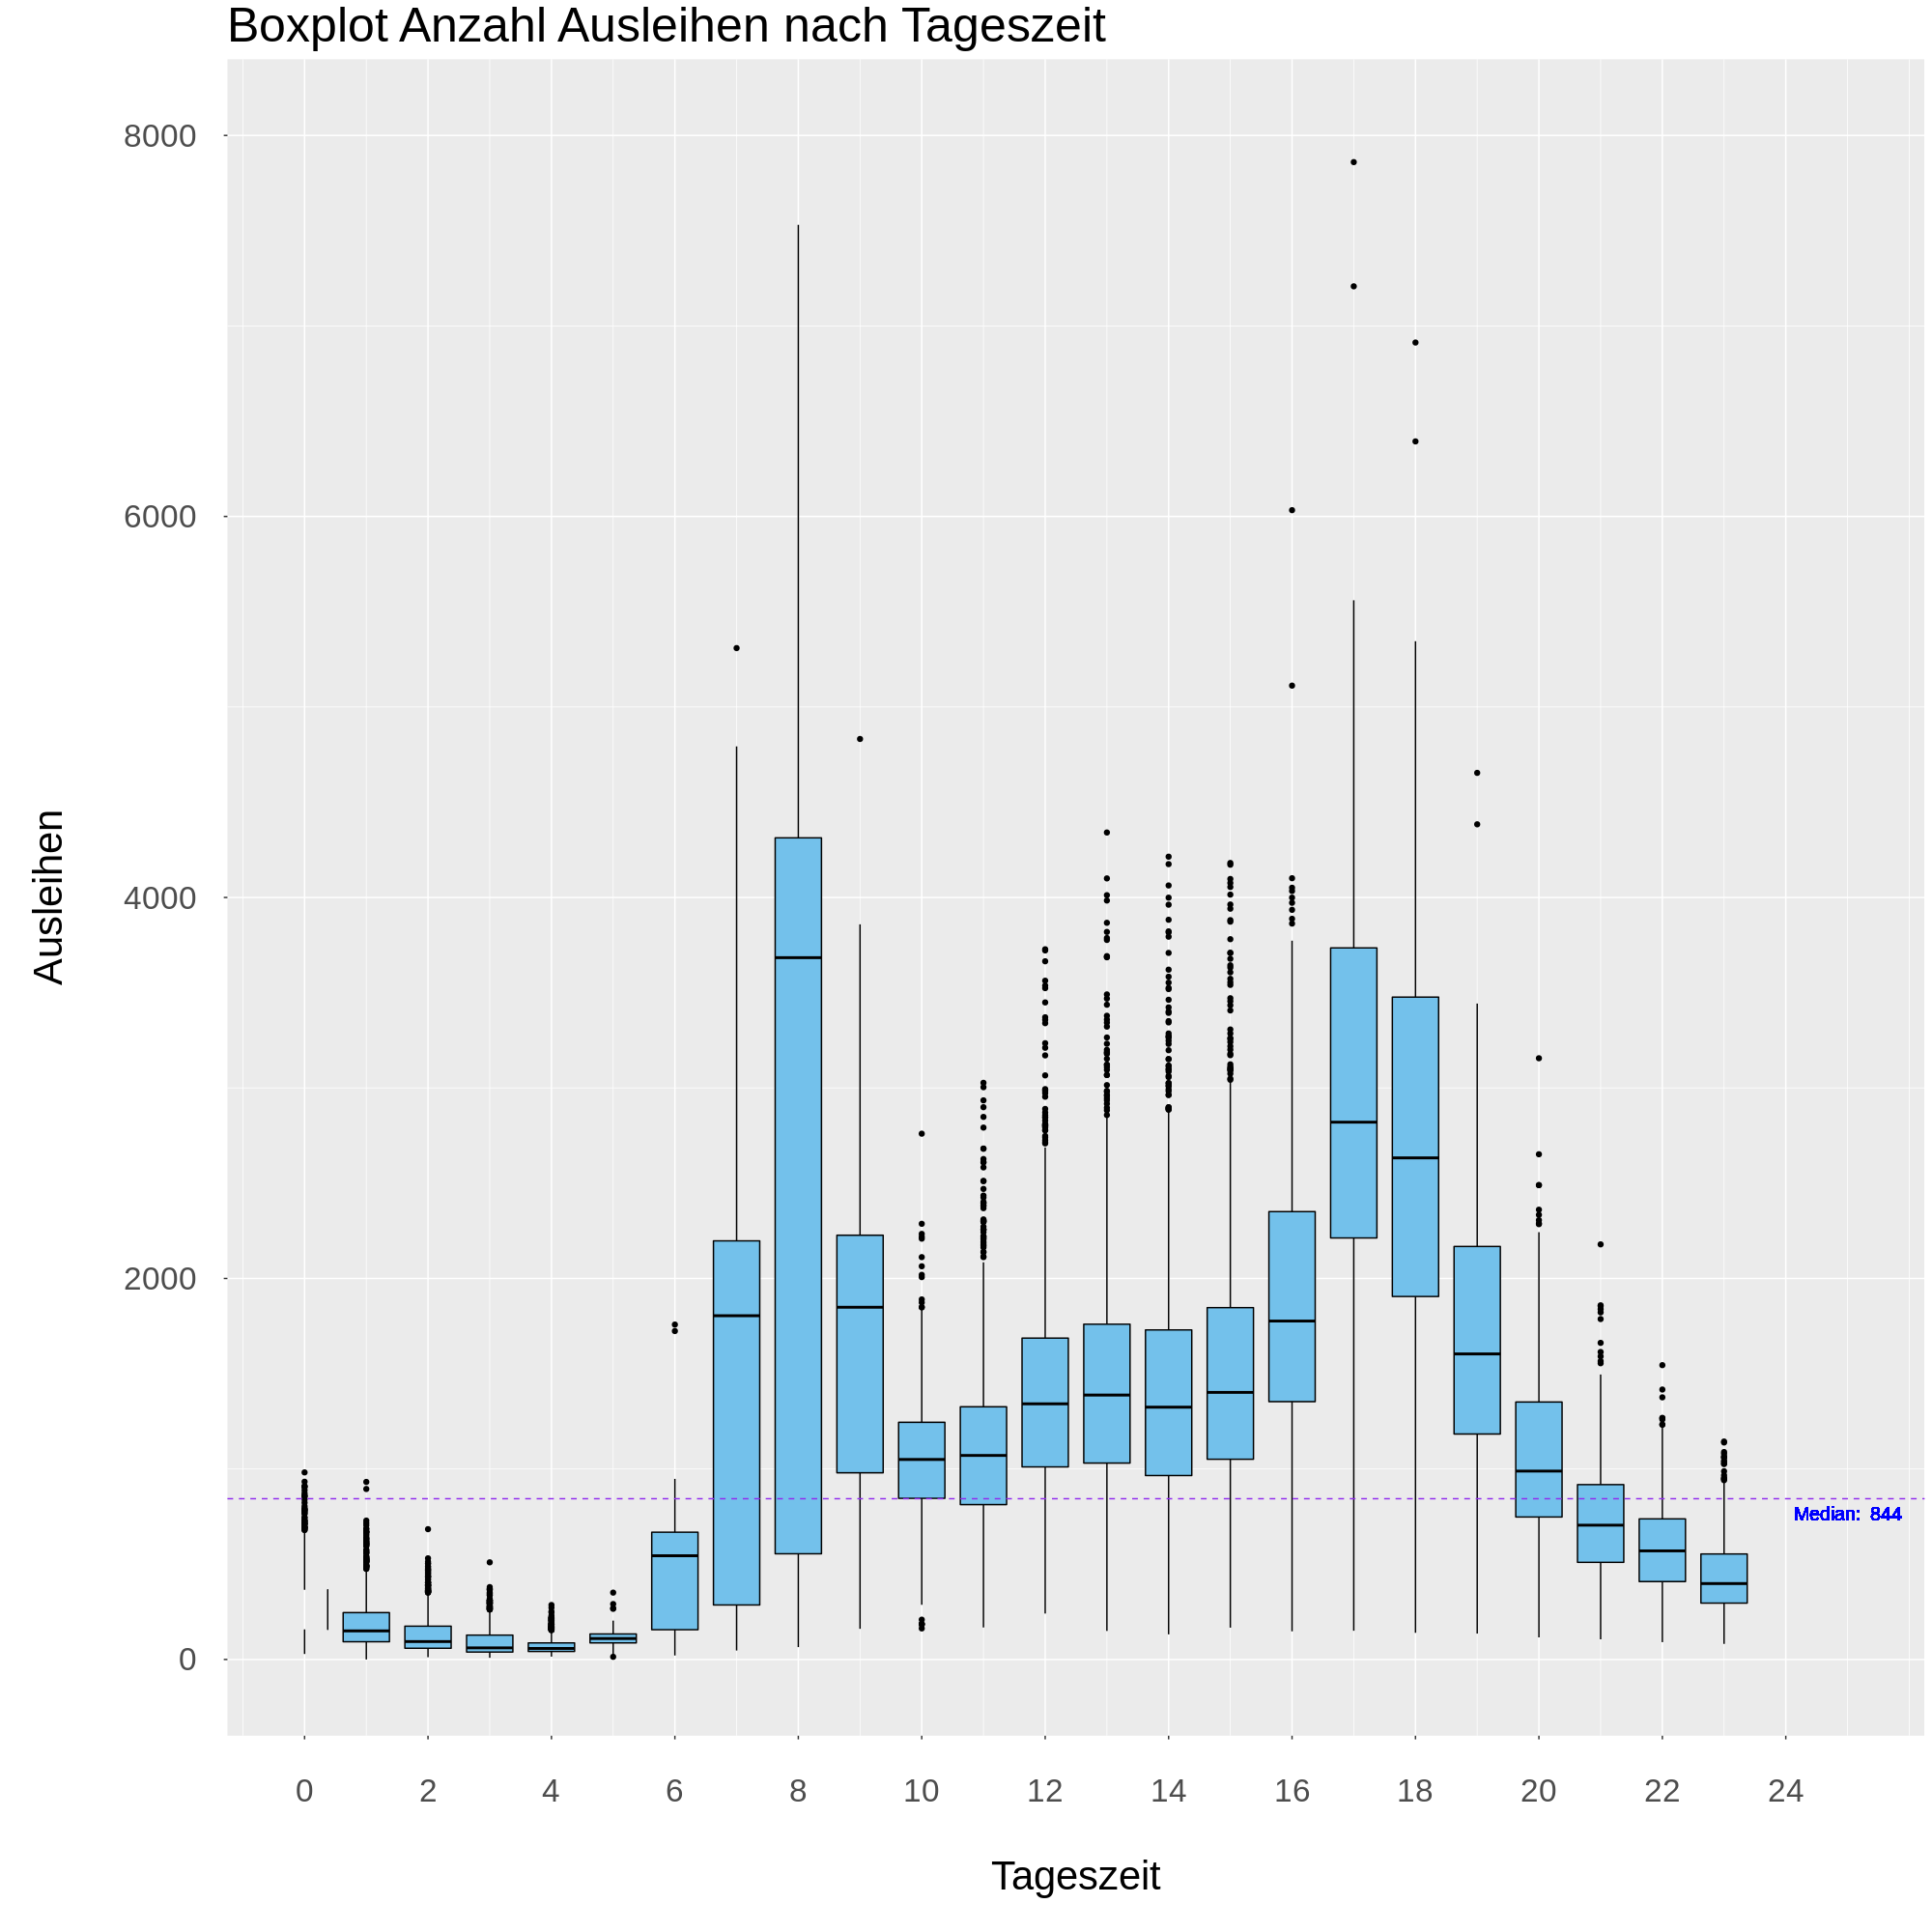

In [15]:
#Median aus Ausleihen berechnen
data <- bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="blue", vjust = -10.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 30) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


#Könnte die Zeit auf 24H ändern mit https://stackoverflow.com/questions/42950909/plotting-daytime-without-date-in-ggplot2/42955819?noredirect=1#comment73016883_42955819

Aus diesem Histogramm kann abgelesen werden, zu welchen Tageszeiten durchschnittlich am meisten Fahrräder ausgeliehen werden. Es ist zudem auch sichtbar, wie gross die Streuung zu den verschiedenen Uhrzeiten ist.

### Boxplot Anzahl Ausleihen nach Tageszeit am Wochenende

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


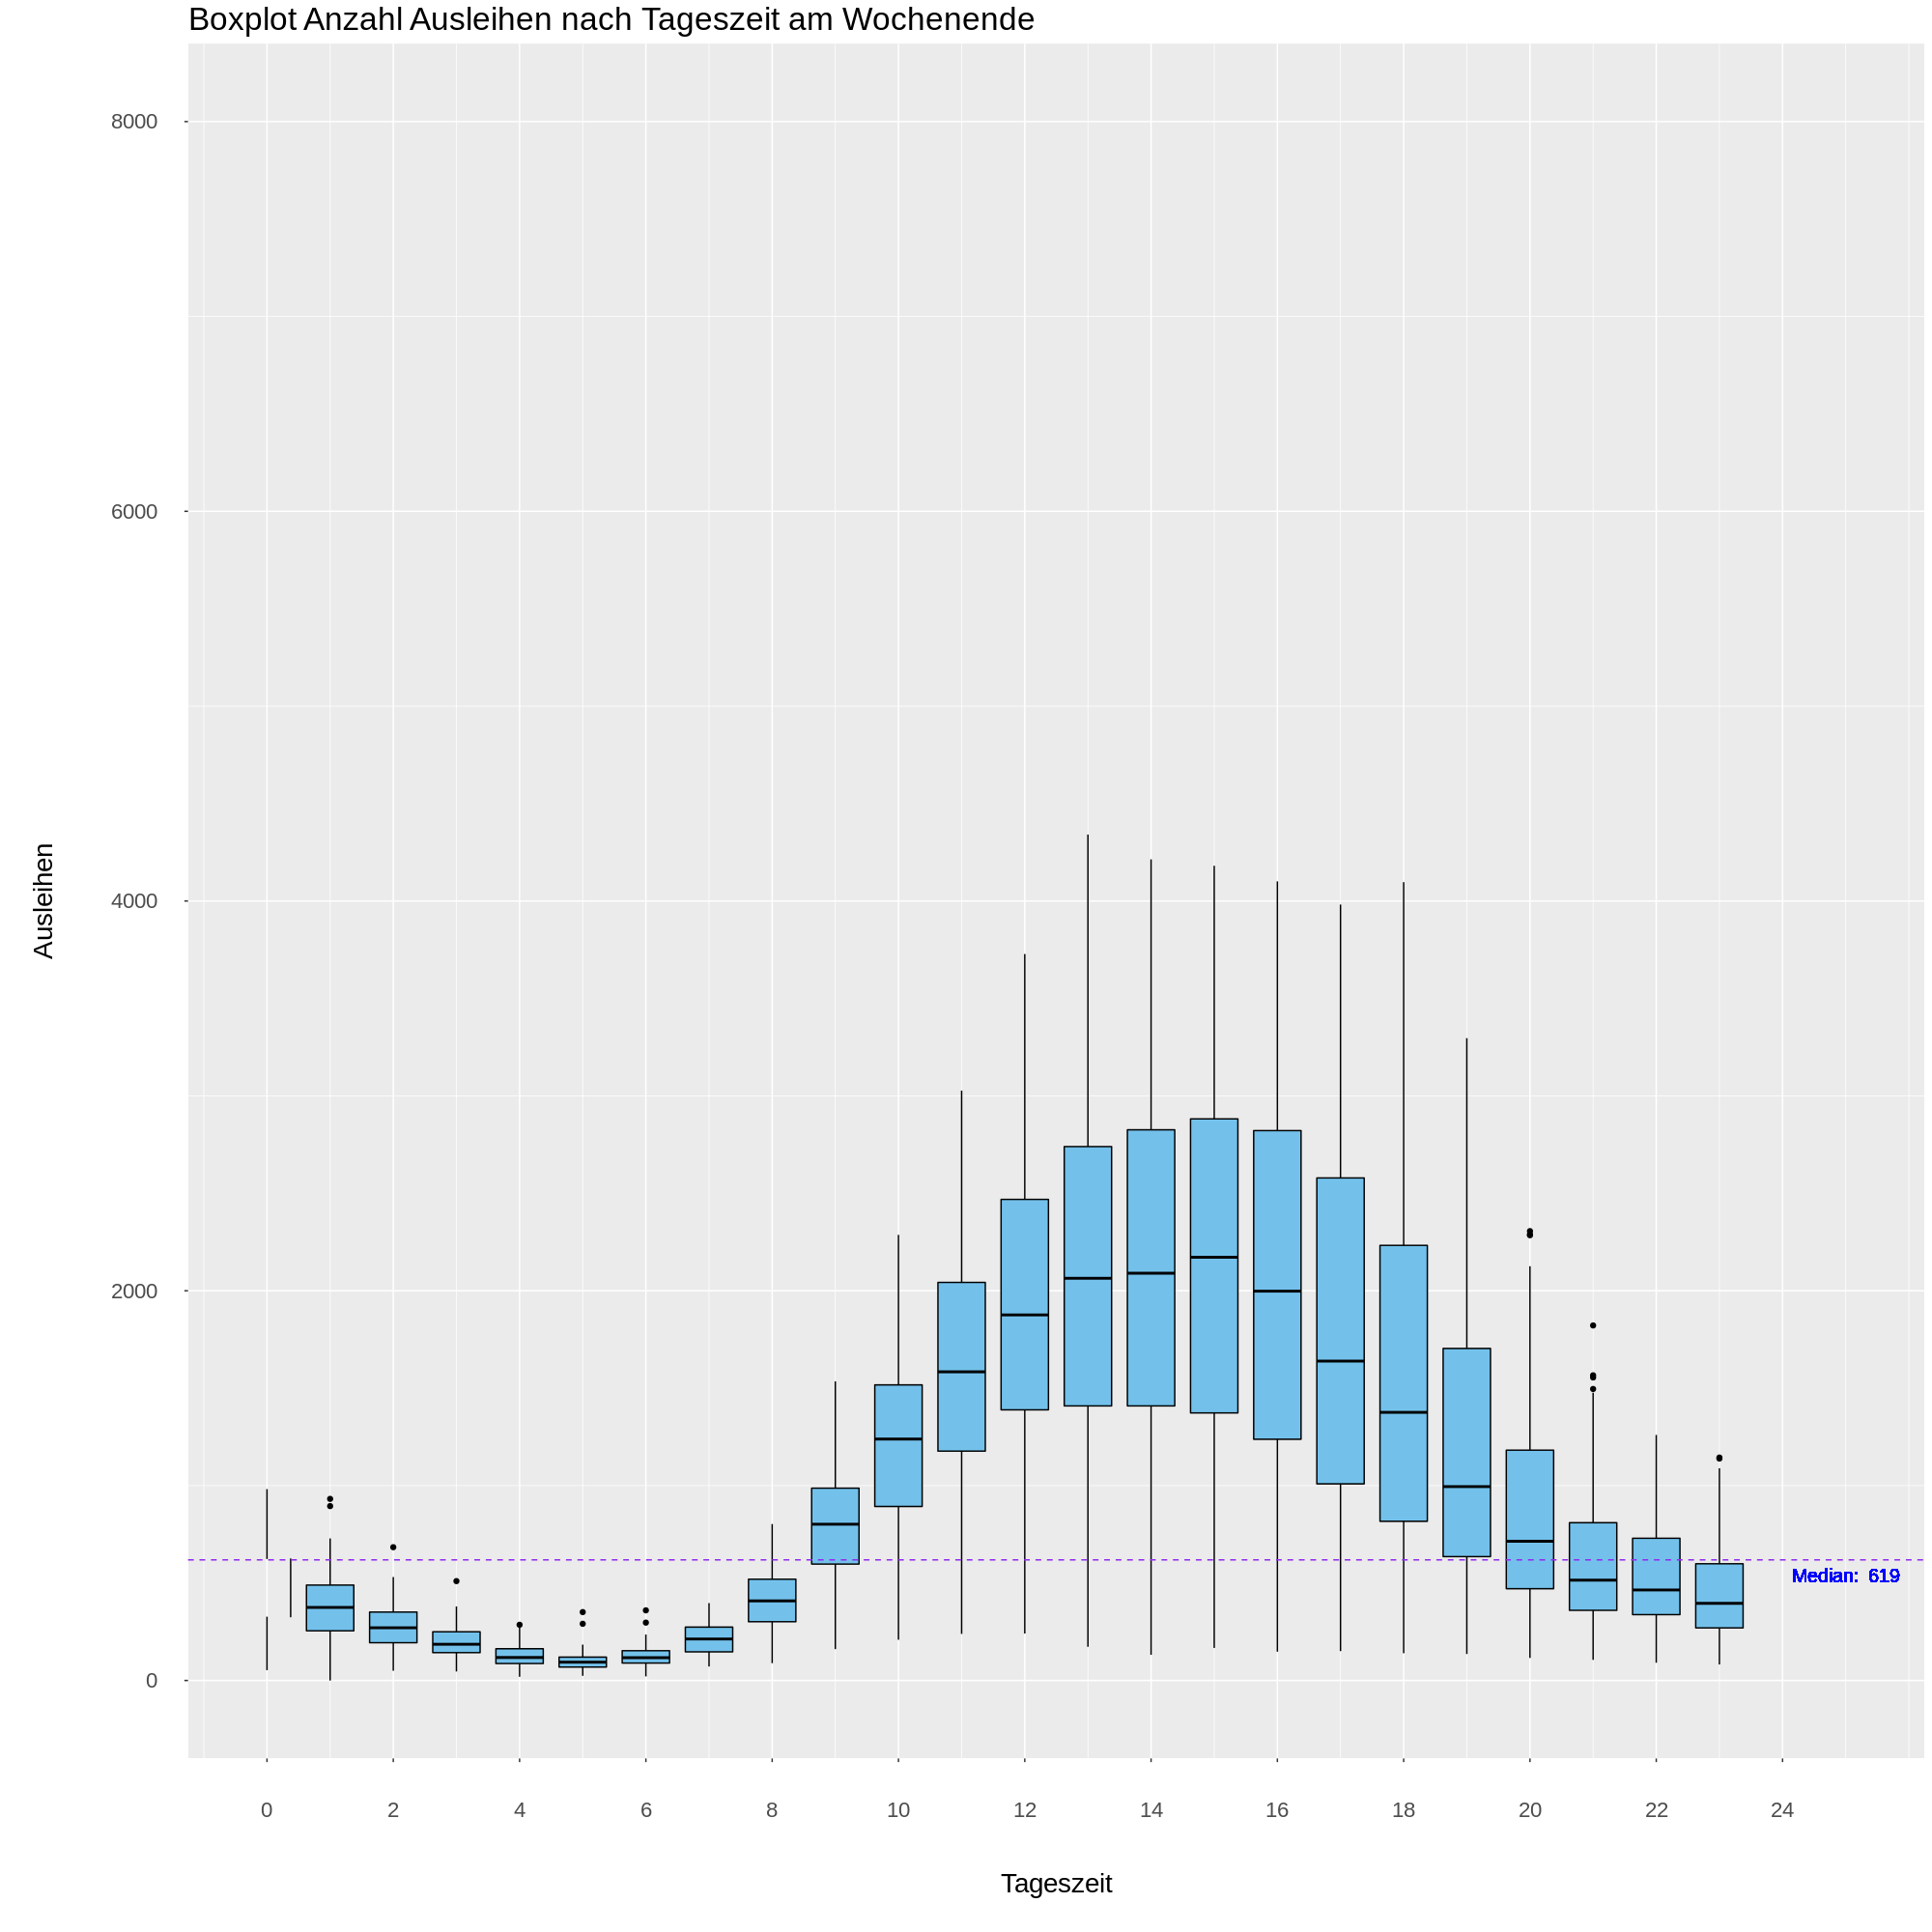

In [16]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_weekend == 1)

#Median aus Ausleihen berechnen
data <- filter_bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit am Wochenende") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="blue", vjust = -7.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +



#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit unter der Woche

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


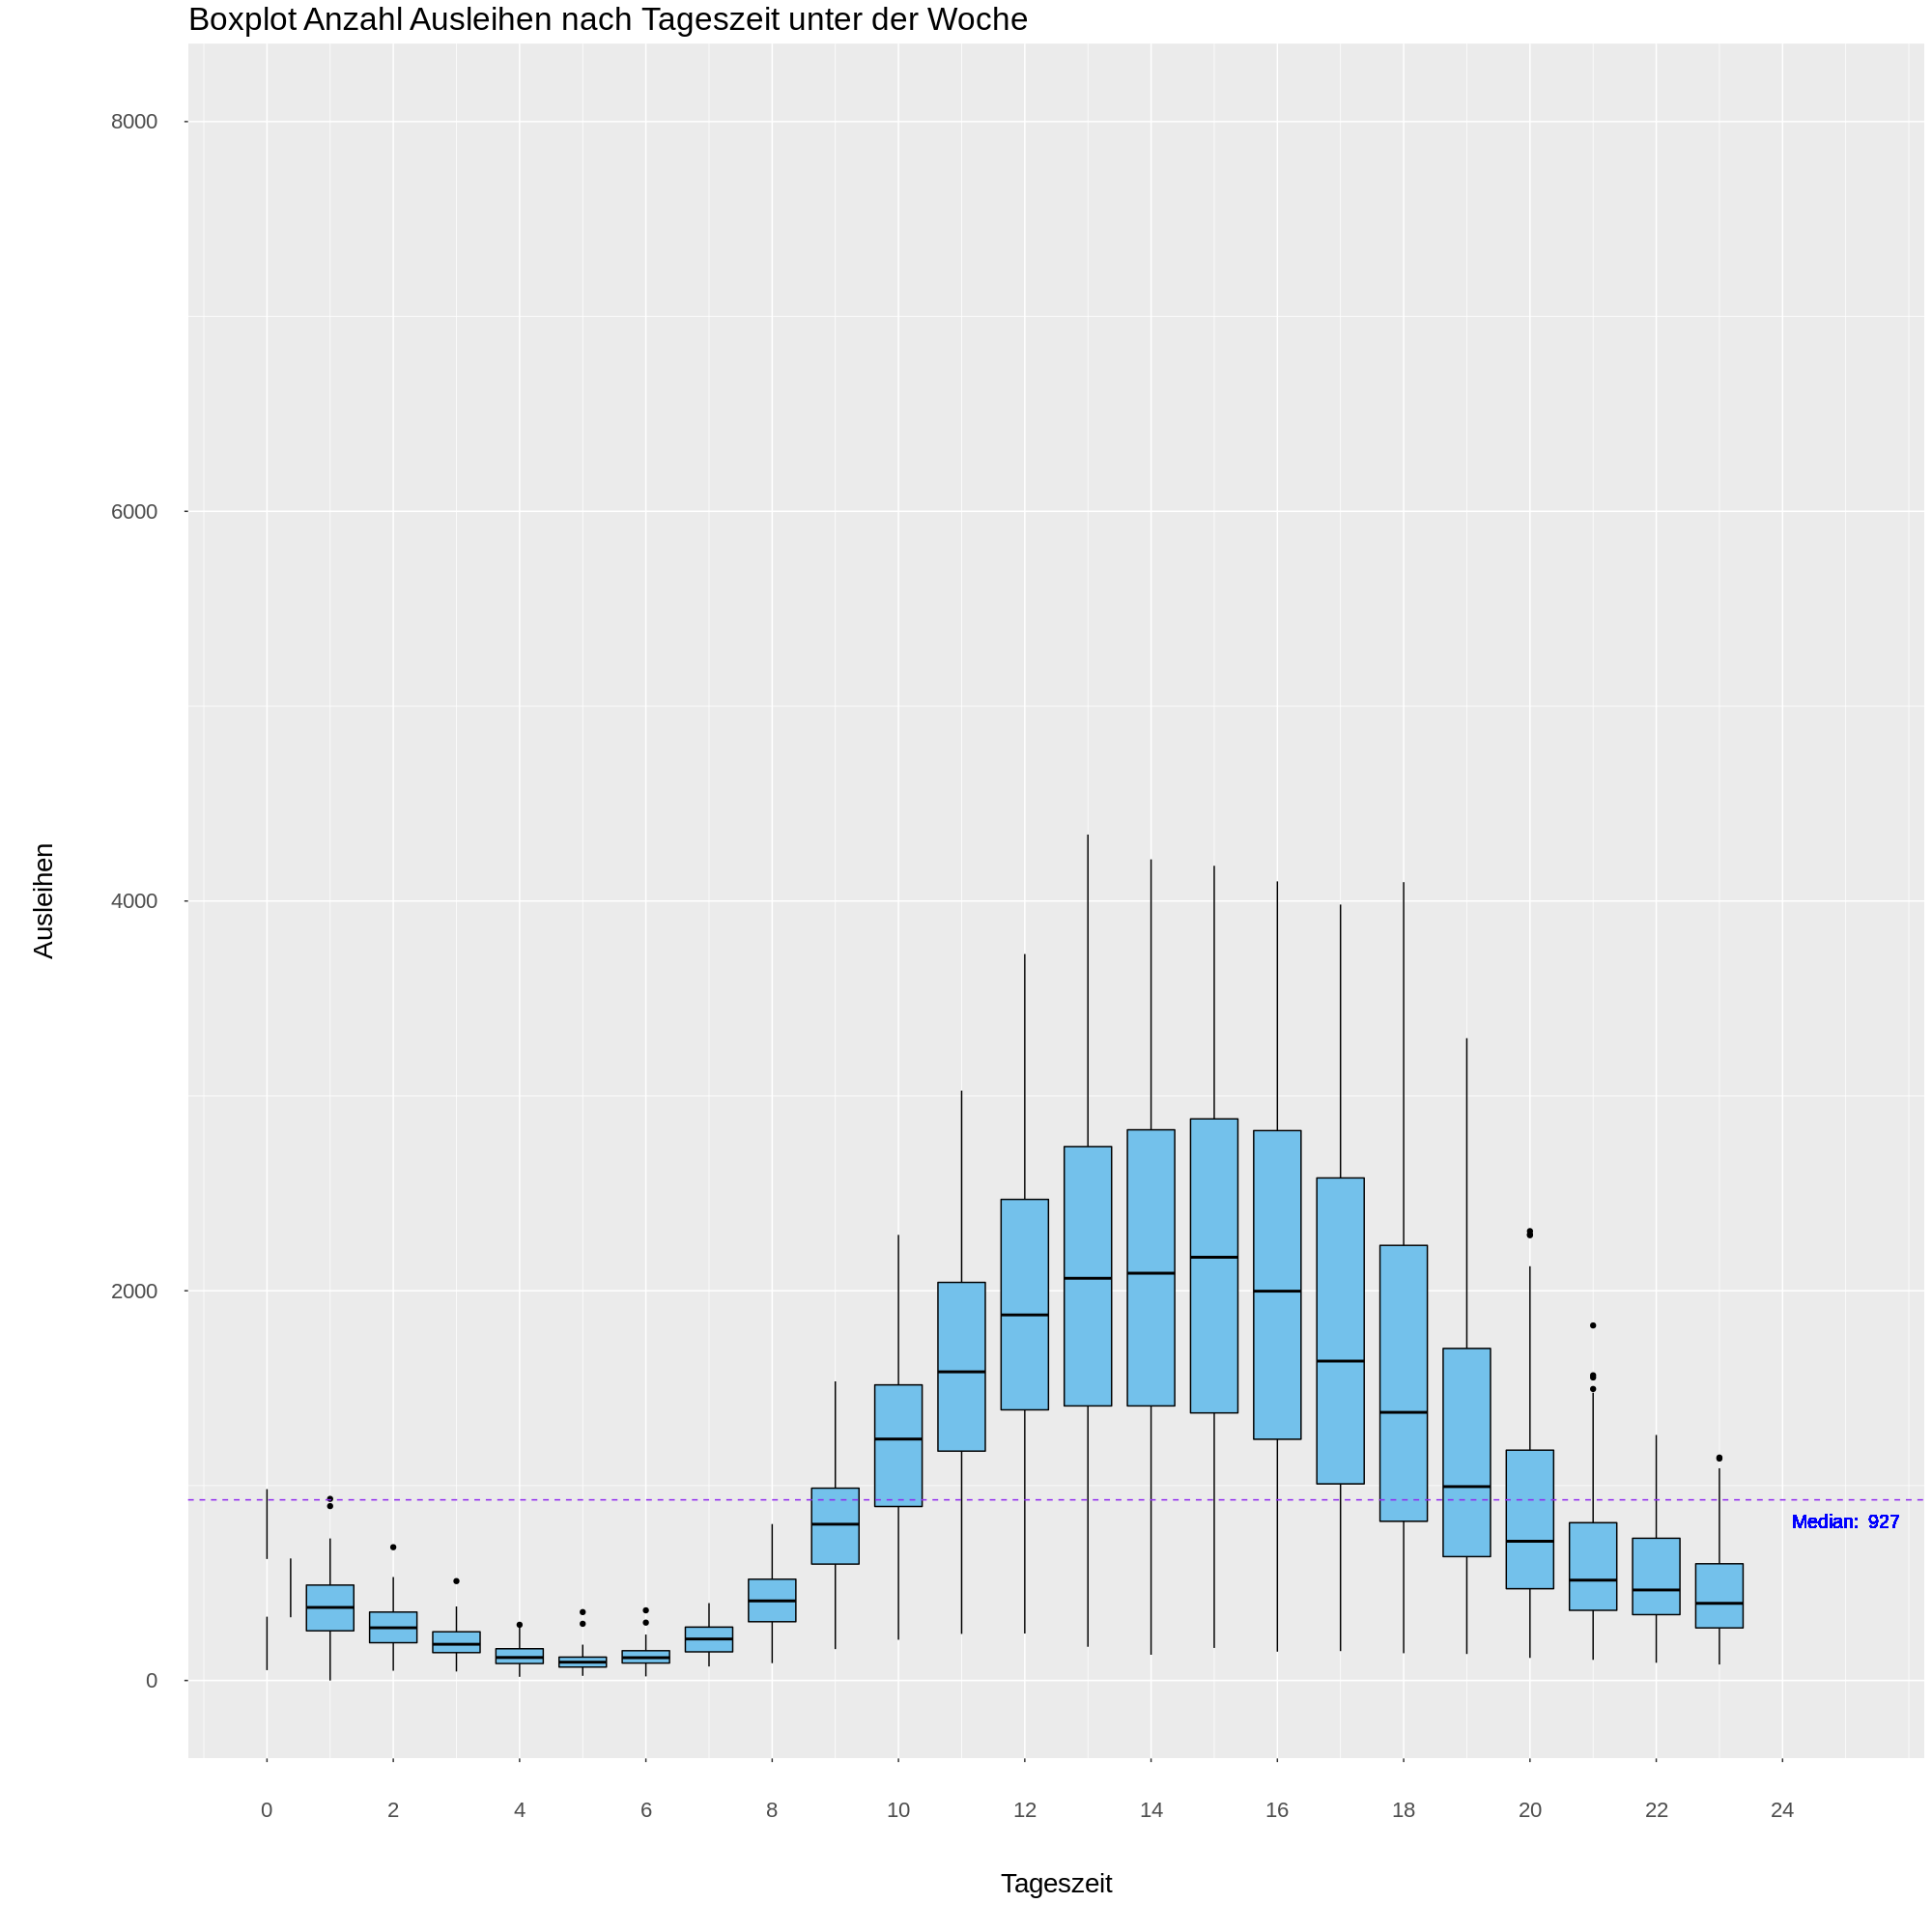

In [17]:
#Filter
filter_bike_data_weekend <- bike_data %>% filter(bike_data$is_weekend == 0)

#Median aus Ausleihen berechnen
data <- filter_bike_data_weekend$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit unter der Woche") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="blue", vjust = -11.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit an Ferientagen

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


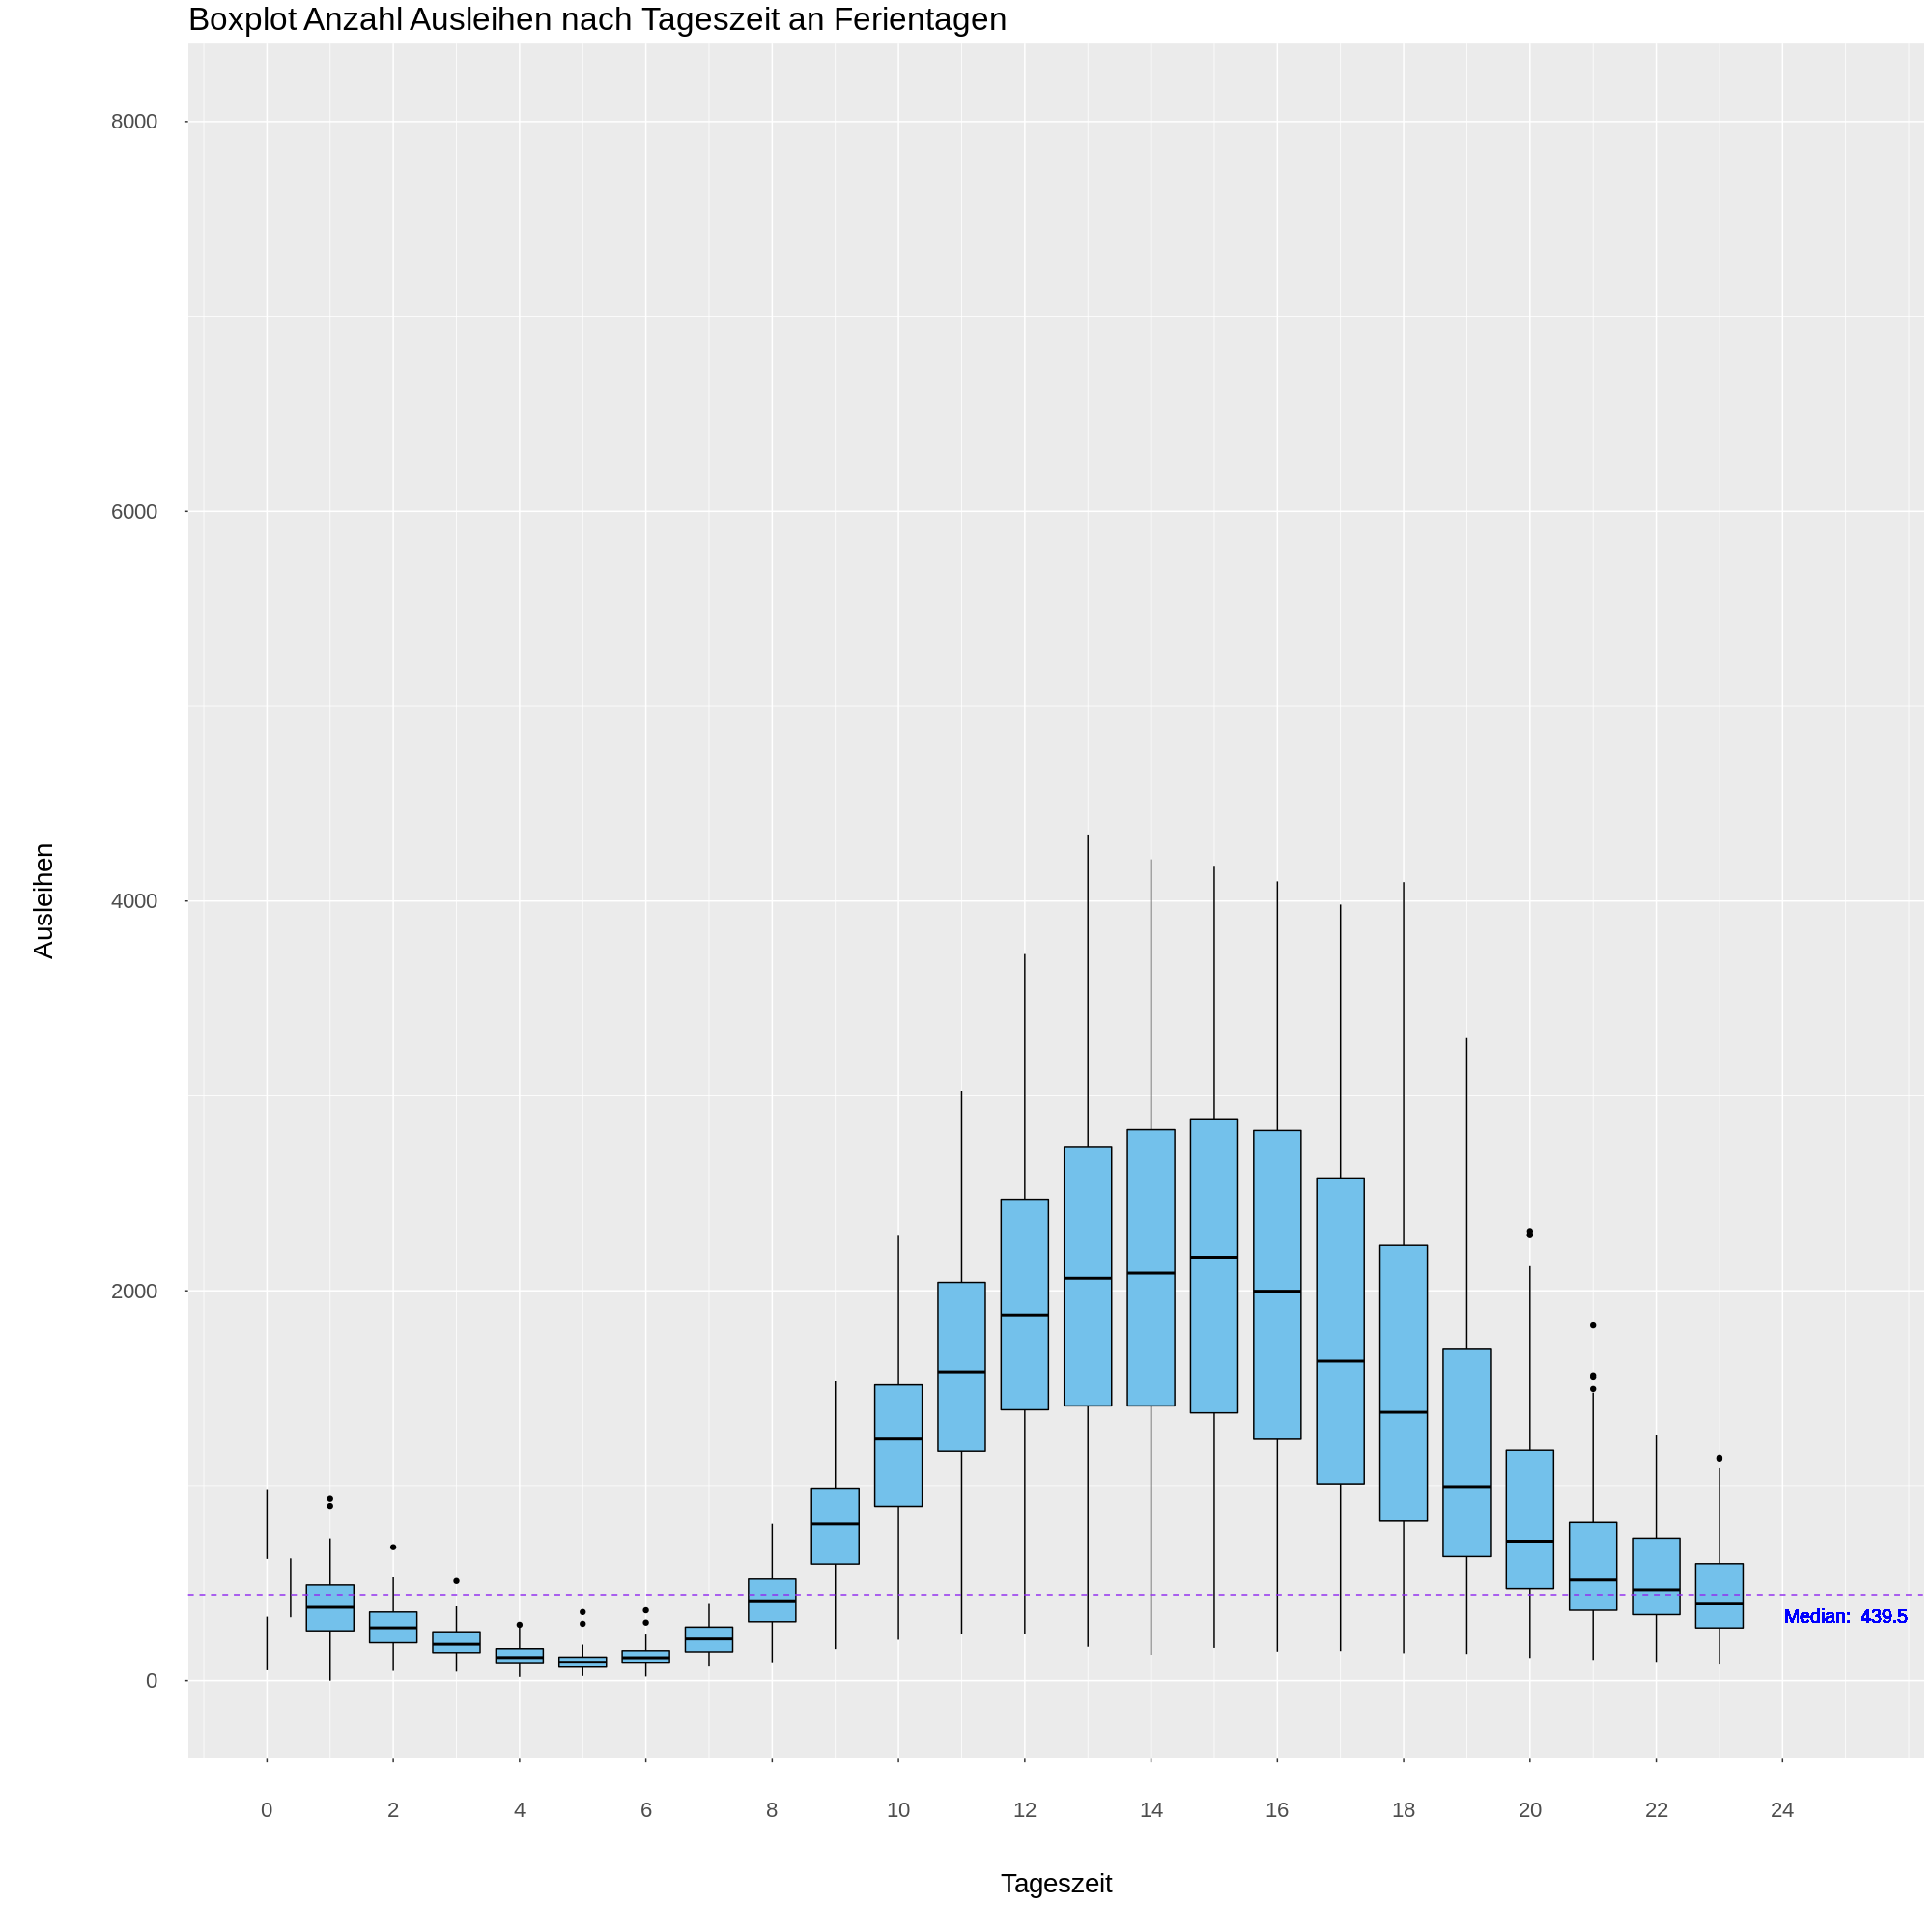

In [18]:
#Filter
filter_bike_data_holiday <- bike_data %>% filter(bike_data$is_holiday == 1)

#Median aus Ausleihen berechnen
data <- filter_bike_data_holiday$cnt
med <-median(data)
zusammen <- paste("Median: ",med)



#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit an Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="blue", vjust = -4.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +



#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


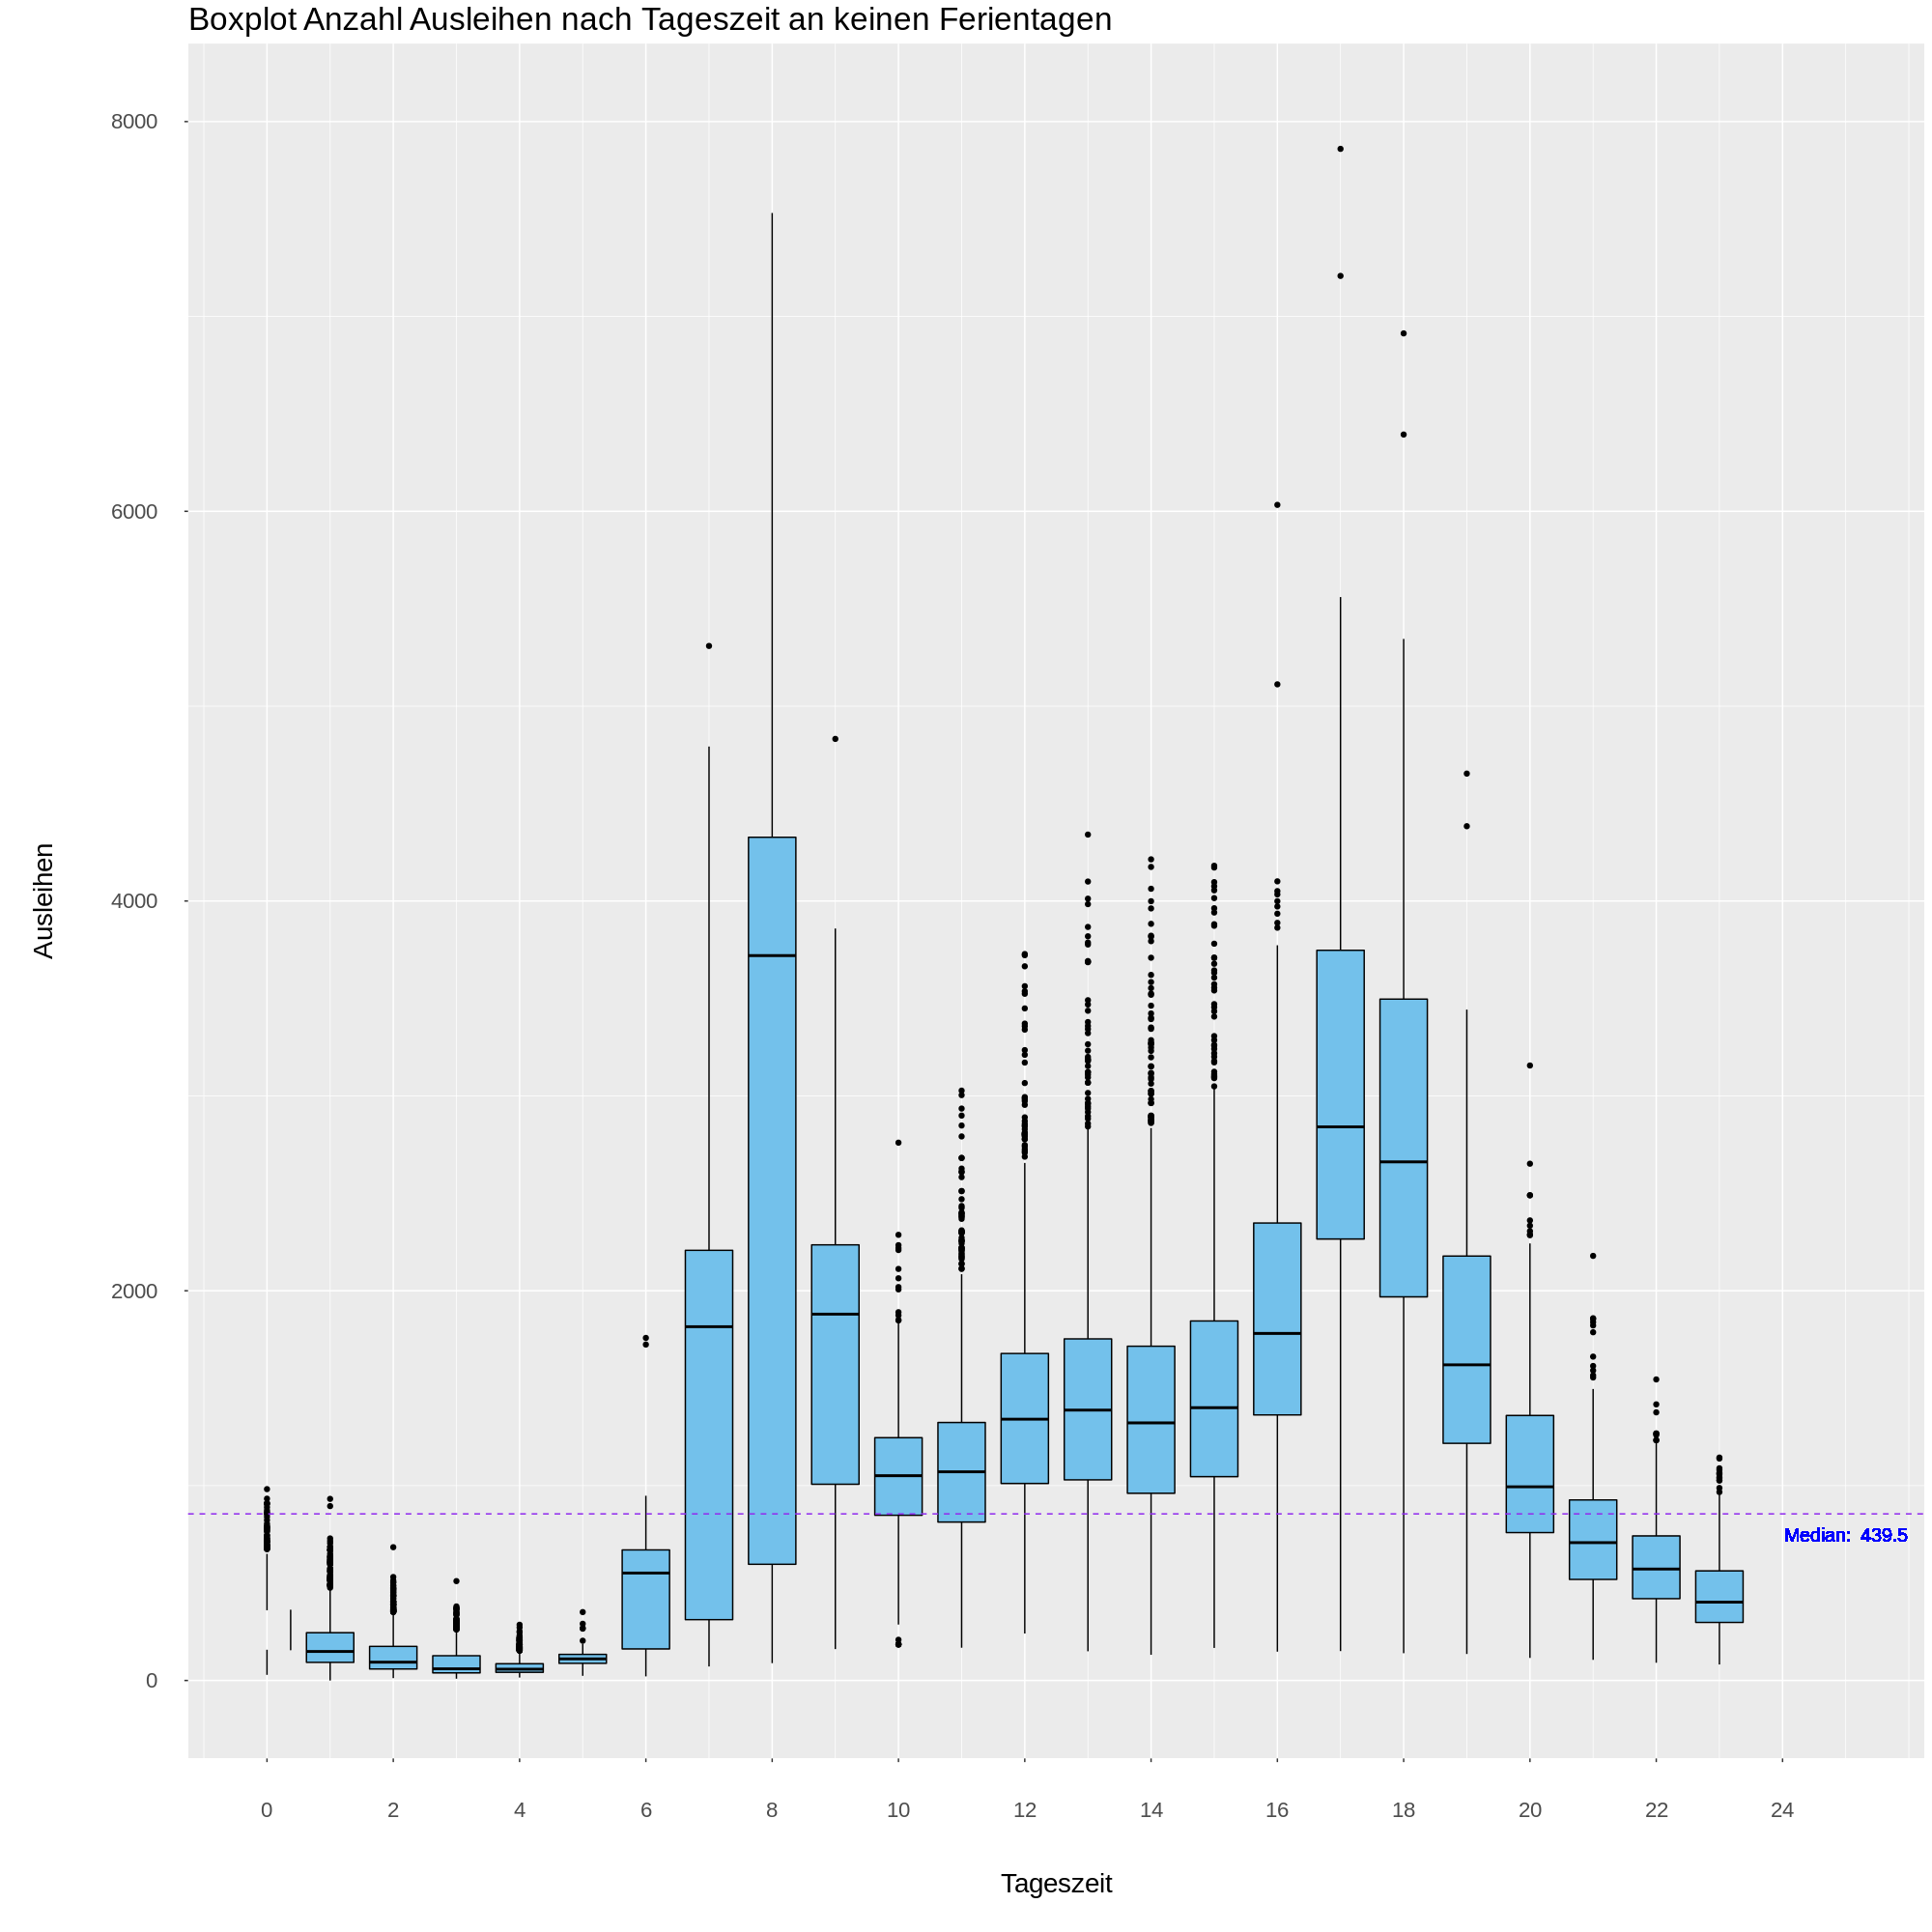

In [19]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_holiday == 0)

#Median aus Ausleihen berechnen
med <- filter_bike_data$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="blue", vjust = -10.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +



#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


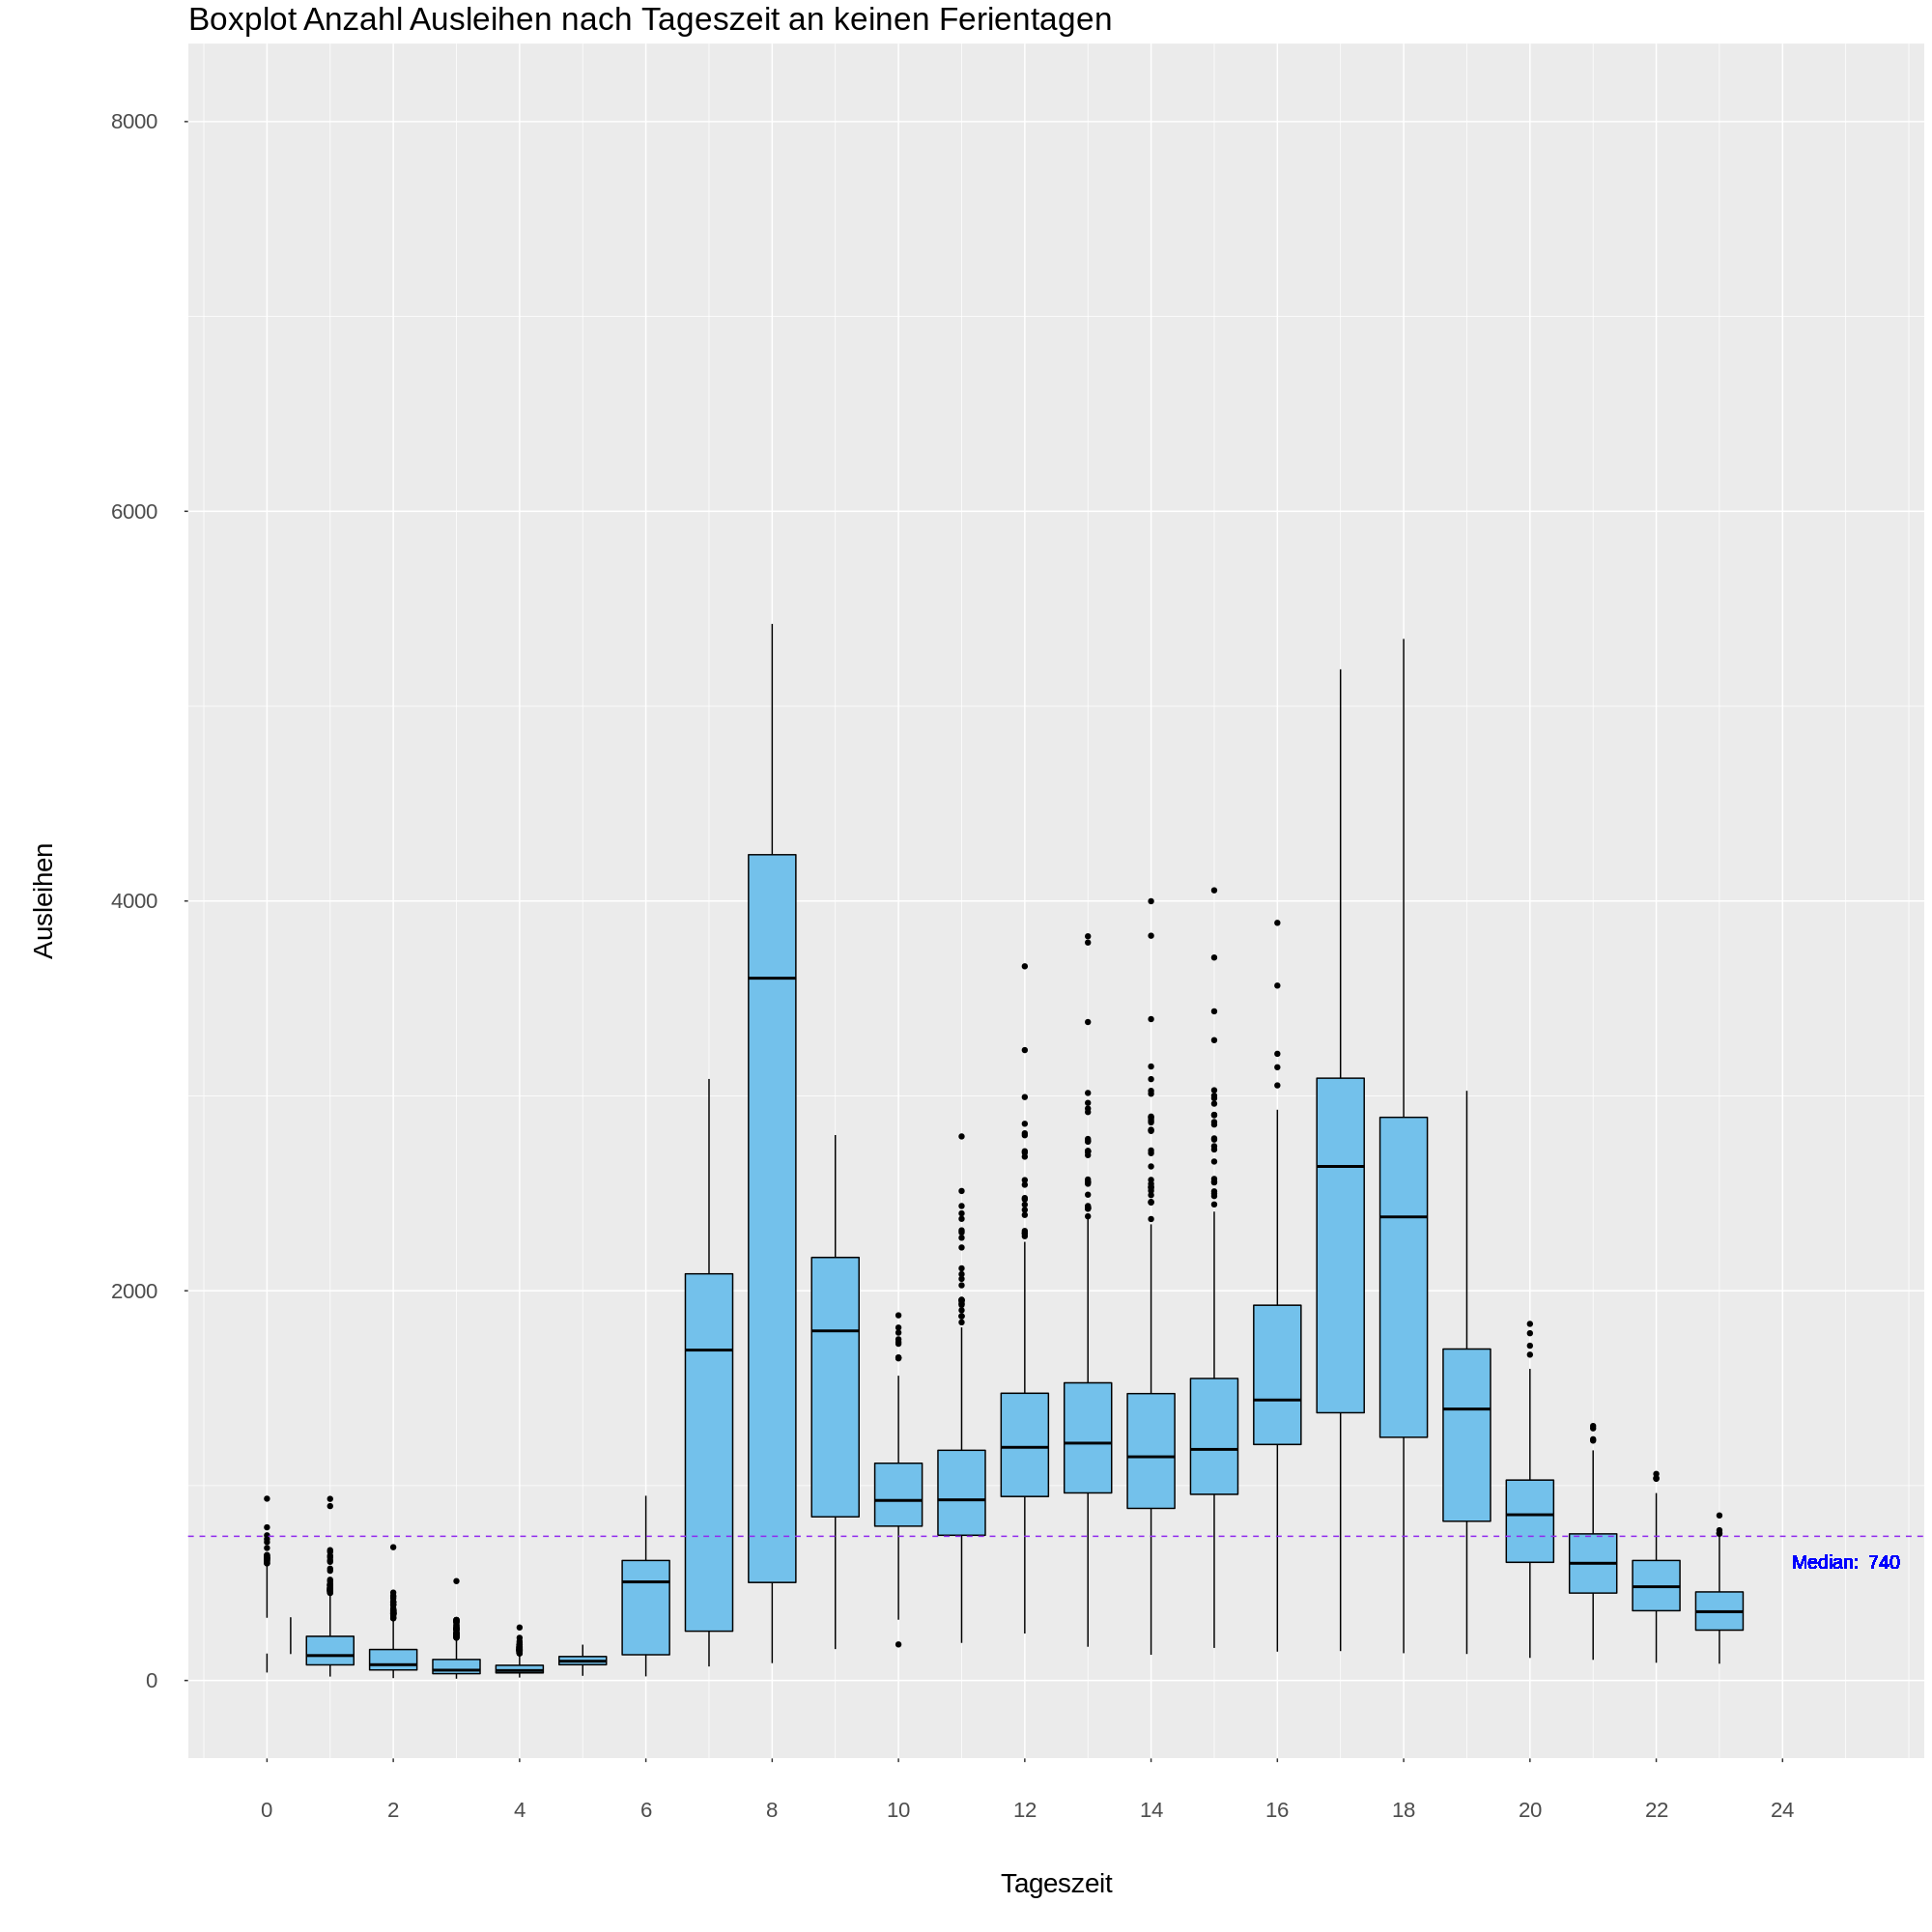

In [20]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$season == 2 | bike_data$season == 3)

#Median aus Ausleihen berechnen
data <- filter_bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen, y=20), colour="blue", vjust = -8.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Monat

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



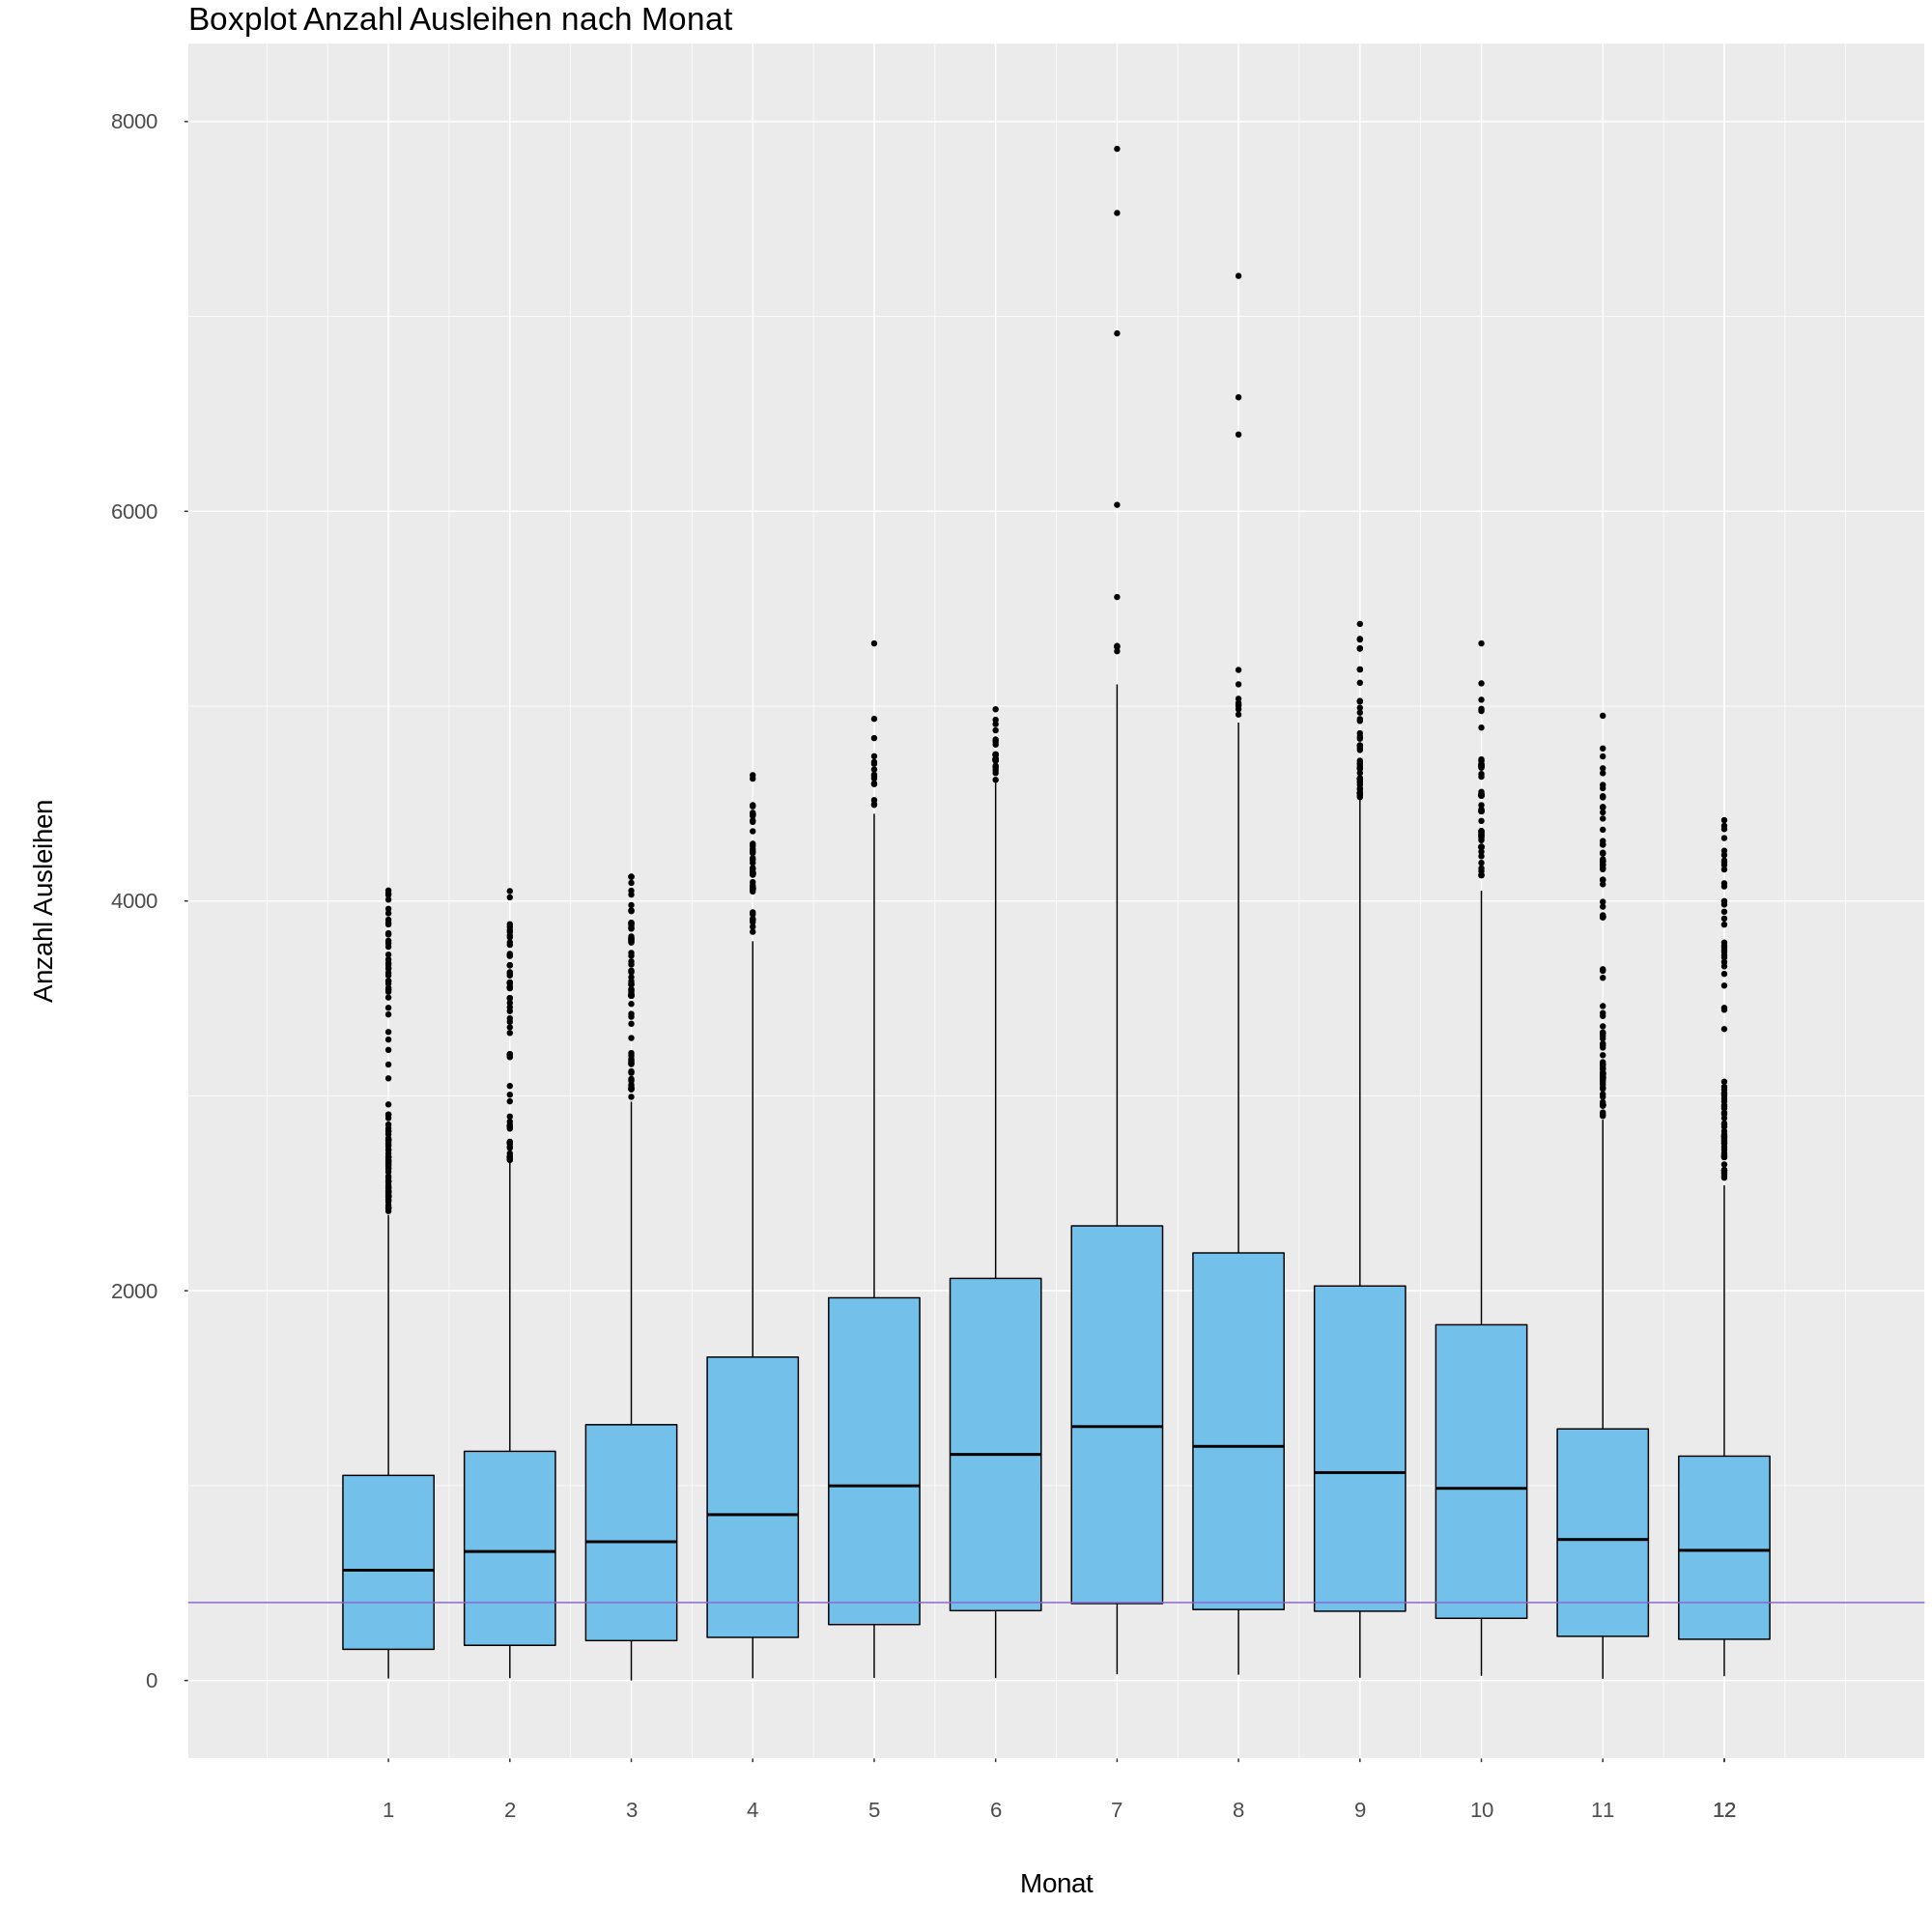

In [21]:
#Boxplot nach Anzahl Ausleihen und Monat, gruppiert nach Monat
#TODO Median berechnen!!!
ggplot(data = bike_data, aes(month, cnt, group=month)) +
       geom_boxplot(fill="#73c1eb", colour="black") +
xlab("Monat") +
ylab("Anzahl Ausleihen") +
coord_cartesian(xlim = c(0, 13)) +
scale_y_continuous(labels = number_format()) +
ggtitle("Boxplot Anzahl Ausleihen nach Monat") +
geom_hline(yintercept = 400, color = "mediumpurple3", size = 0.5) +
scale_x_continuous(limits = c(0, 25), breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 12)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Korrelation zwischen gemessener Temperatur (t1) und Ausleihen (cnt) - v1

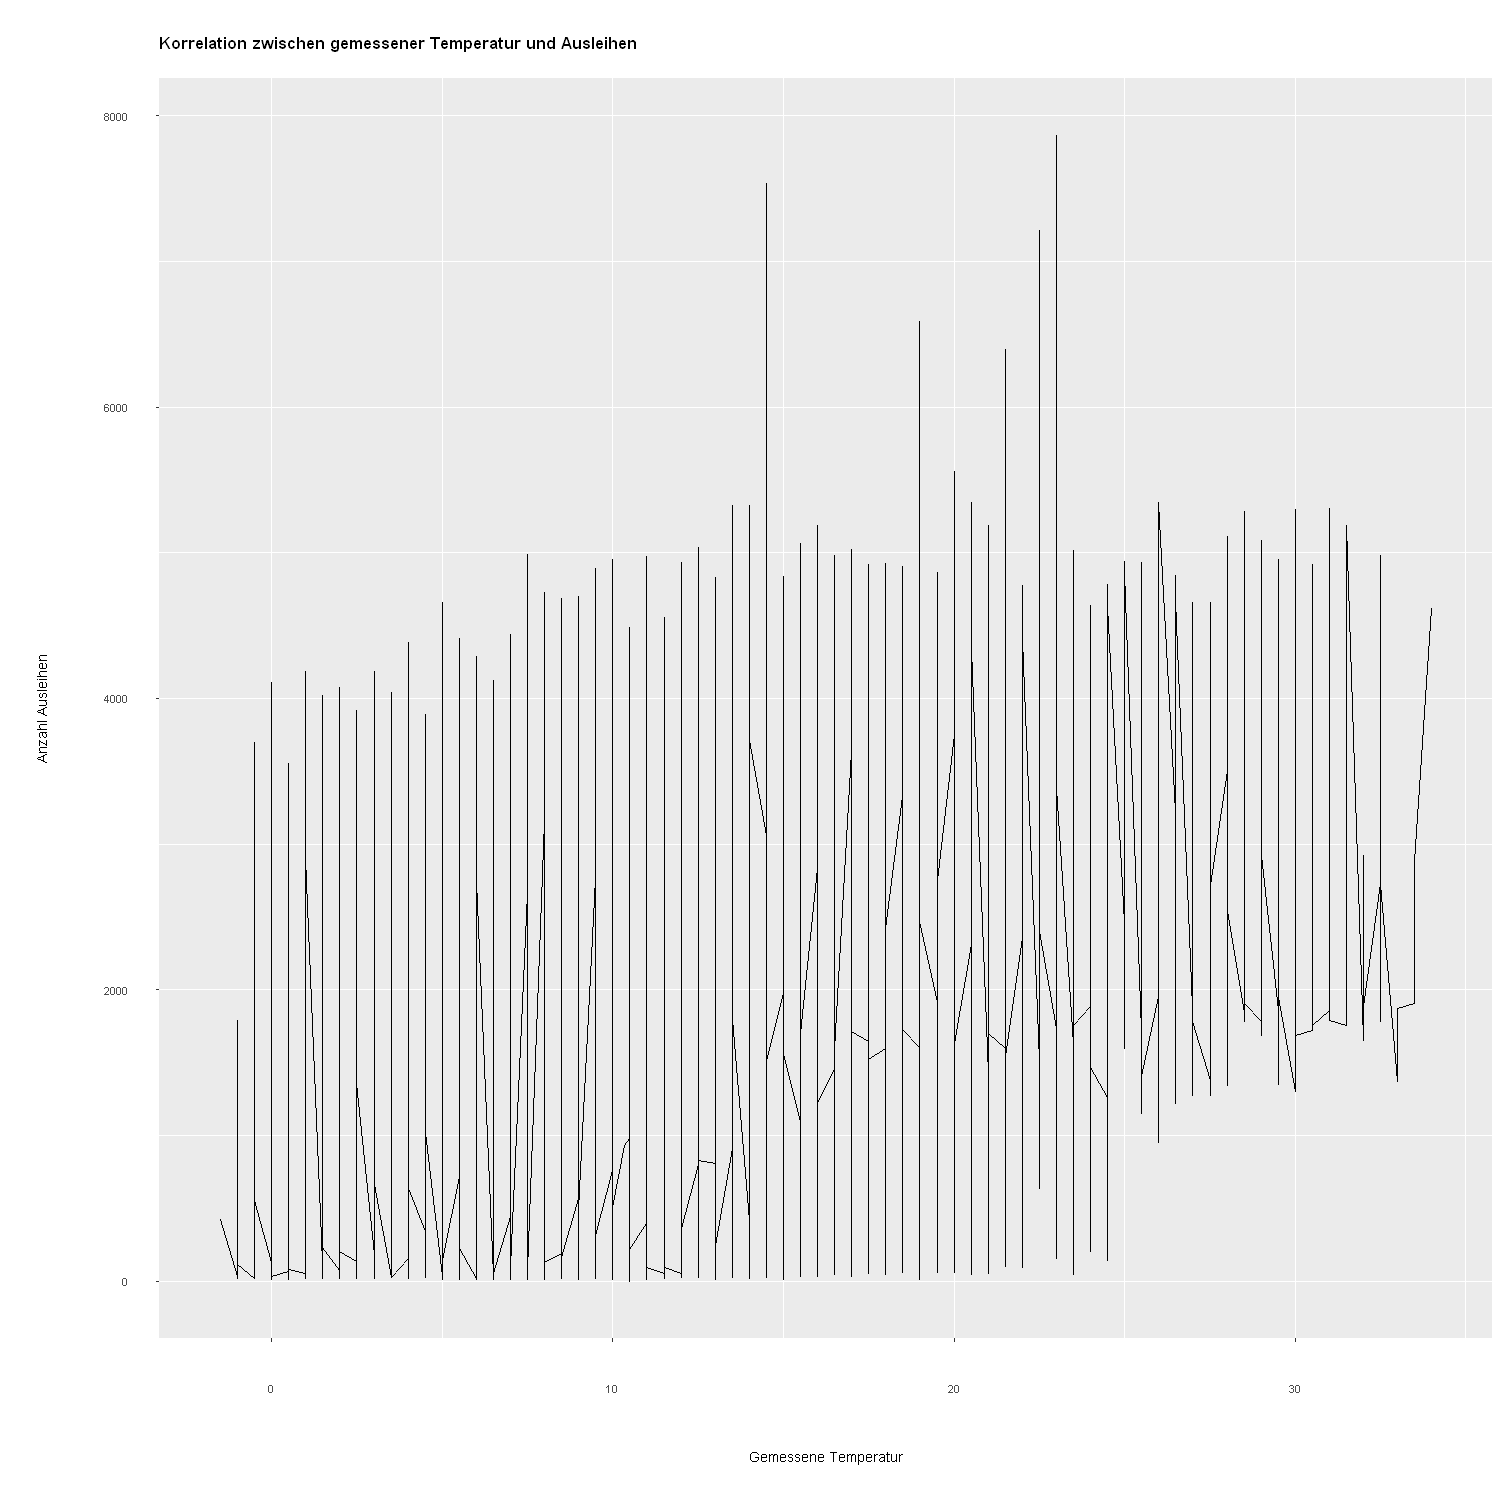

In [16]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")

ggplot(data = bike_data, aes(x = t1, y = cnt)) + 
        geom_line() +
xlab("Gemessene Temperatur") +
ylab("Anzahl Ausleihen") +
ggtitle("Korrelation zwischen gemessener Temperatur und Ausleihen") +

theme(text = element_text(size = 10) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )

### Balkendiagramm mit Anzahl Ausleihen und Temperatur

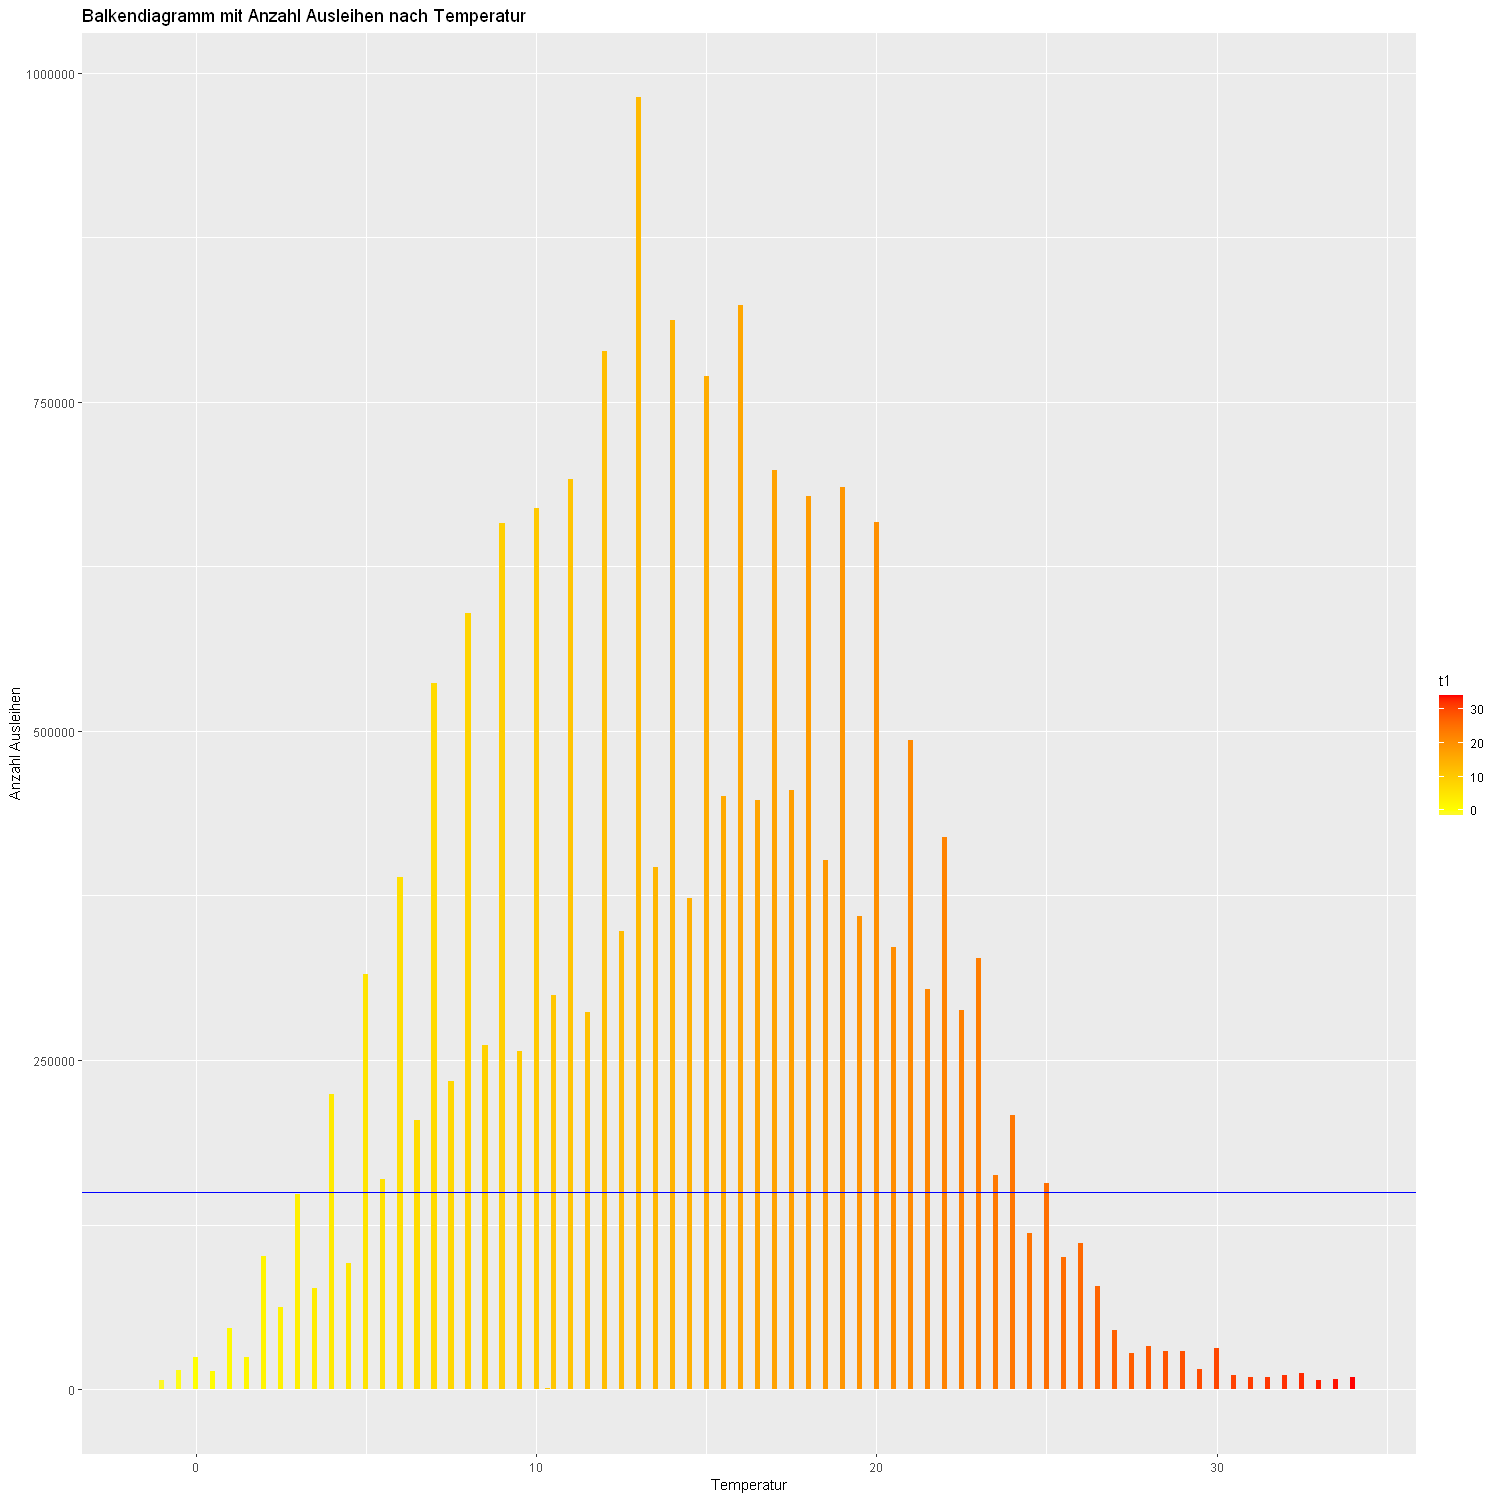

In [73]:
ggplot(data = bike_data, aes(x=t1, y=cnt, fill=t1)) +
       geom_col() +
 scale_fill_gradient2(low = "blue", high = "red", mid ="yellow") +
xlab("Temperatur") +
ylab("Anzahl Ausleihen") +
geom_hline(yintercept = 150000, color = "blue", size = 0.5) +
ggtitle("Balkendiagramm mit Anzahl Ausleihen nach Temperatur")


# Reihenfolge funktioniert nicht (Farben)!! https://stackoverflow.com/questions/63518639/r-ggplot-scale-fill-gradient2-on-histogram-vs-dotplot **



### Visualisierung der Korrelation mit einer Heatmap

Warning message:
"package 'reshape2' is in use and will not be installed"

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,04.01.2015,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,04.01.2015,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,04.01.2015,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,04.01.2015,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,04.01.2015,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,04.01.2015,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


instant,hr,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,0,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,1,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,2,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,3,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,4,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,5,1,46,2.0,2.0,93.0,4.0,1,0,1,3


,instant,hr,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
instant,1.00,0.00,0.47,0.04,0.13,0.14,0.12,-0.13,-0.02,0.03,0.00,0.12
hr,0.00,1.00,0.00,0.32,0.17,0.15,-0.30,0.14,-0.04,0.00,0.00,0.00
month,0.47,0.00,1.00,0.06,0.33,0.37,0.11,-0.09,-0.03,-0.01,-0.01,0.20
cnt,0.04,0.32,0.06,1.00,0.39,0.37,-0.46,0.12,-0.17,-0.05,-0.10,-0.12
t1,0.13,0.17,0.33,0.39,1.00,0.99,-0.45,0.15,-0.10,-0.04,-0.01,-0.29
t2,0.14,0.15,0.37,0.37,0.99,1.00,-0.40,0.09,-0.10,-0.04,-0.01,-0.29


Var1,Var2,value
instant,instant,1.00
hr,instant,0.00
month,instant,0.47
cnt,instant,0.04
t1,instant,0.13
t2,instant,0.14


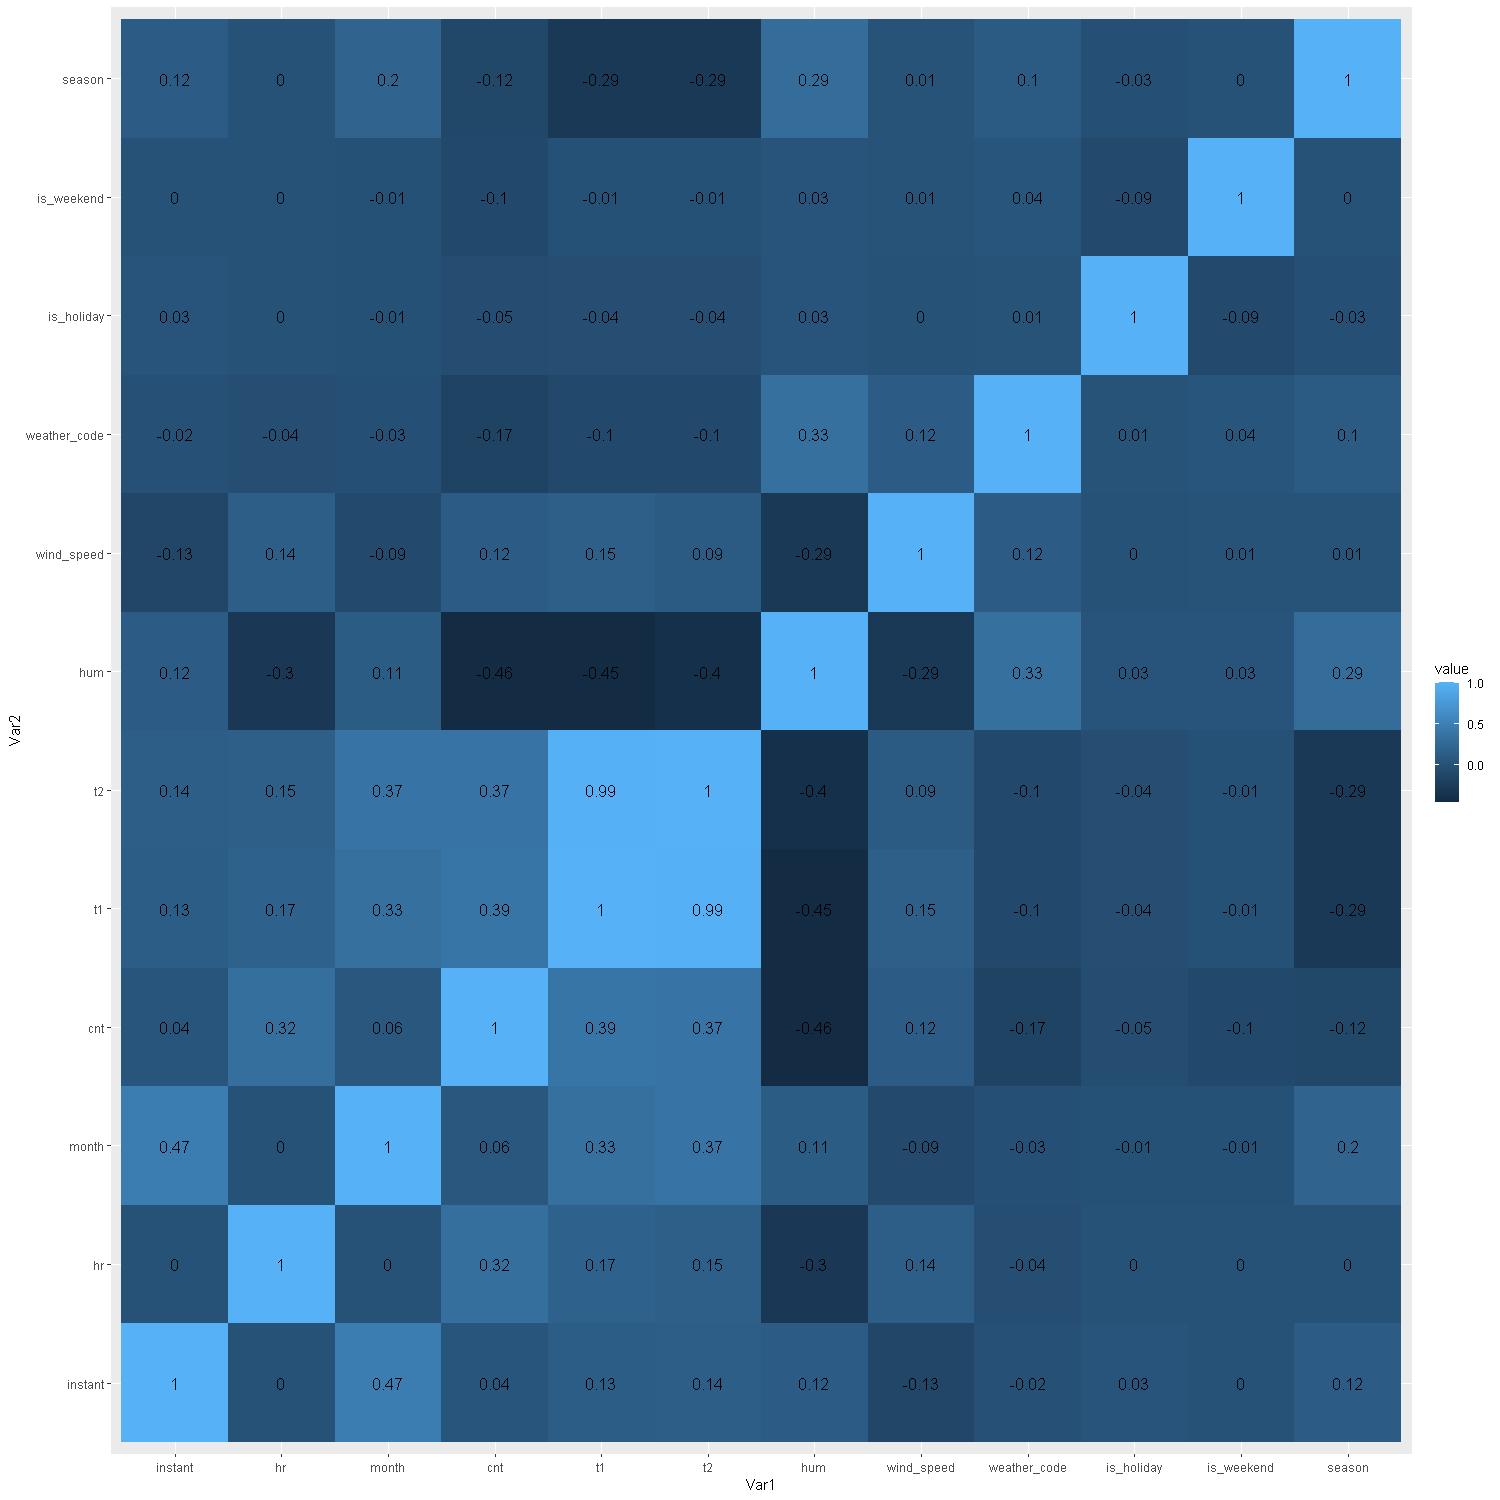

In [55]:
install.packages("reshape2")
library(reshape2)
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head (bike_data)
# Strings ausgeklammert da hier noch eine Umformatierung in Int vorgenommen werden müsste
df = subset(bike_data, select = -c(weekdays, date, time))
head(df)
# Korrelation Matrix erstellen und Korrelation Koeffizienten auf zwei Dezimalstellen runden
cormat <- round(cor(df), 2)
head(cormat)
melted_cormat <- melt(cormat)
head(melted_cormat)
# Korrelation plotten
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4)


### Visualisierung der Korrelation mit einer Heatmap - Neue Anordnung der Werte


Warning message:
"package 'reshape2' is in use and will not be installed"

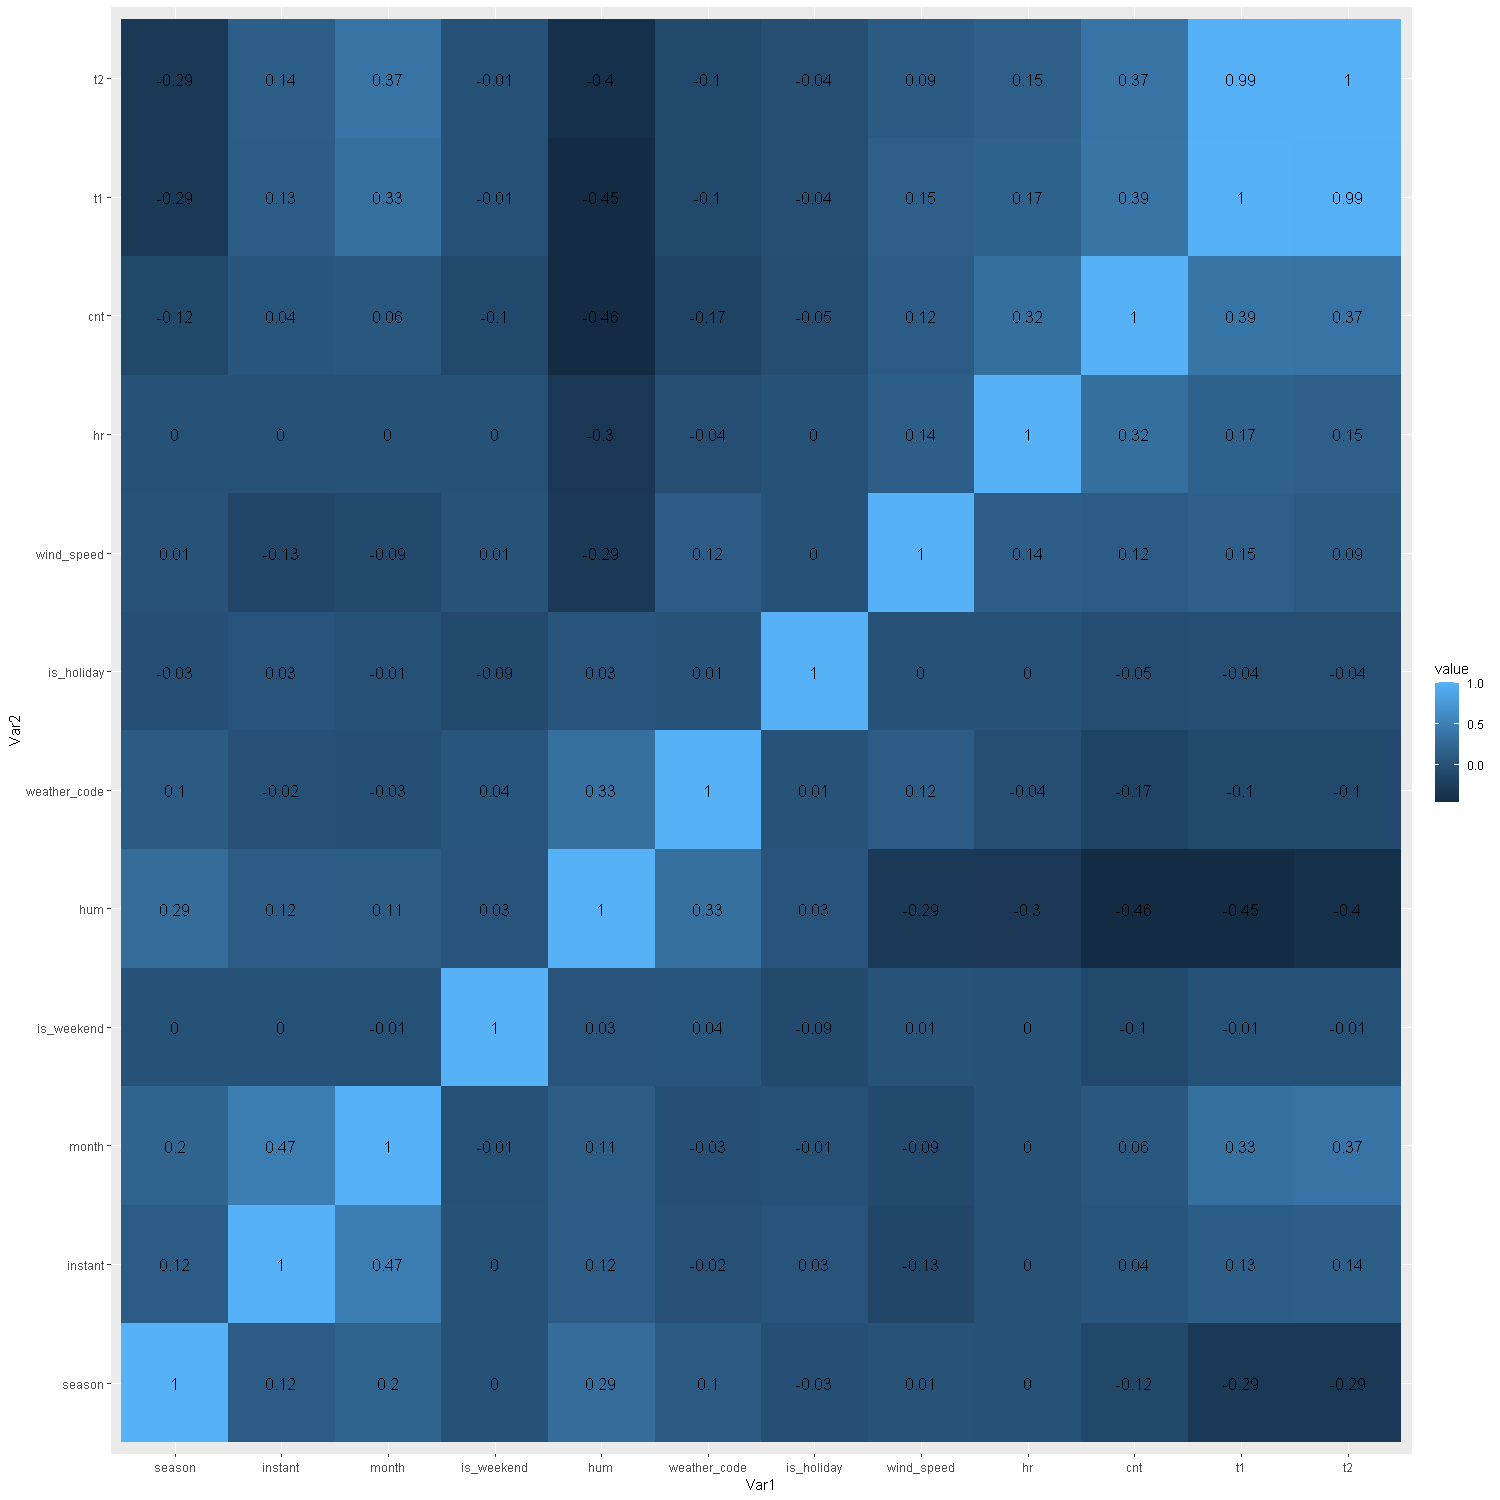

In [53]:
install.packages("reshape2")
library(reshape2)
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
df = subset(bike_data, select = -c(weekdays, date, time))
cormat <- round(cor(df), 2)
dist <- as.dist((1-cormat)/2)
# Hirachisches Clustern der Matrix
hc <- hclust(dist)
cormat <- cormat[hc$order, hc$order]
melted_cormat <- melt(cormat)
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4)


### Balkendiagramm mit Anzahl Ausleihen und Temperatur (gemessene Temperatur - t1)

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,04.01.2015,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,04.01.2015,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,04.01.2015,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,04.01.2015,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,04.01.2015,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,04.01.2015,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


Warning message:
"Removed 3 rows containing missing values (geom_col)."

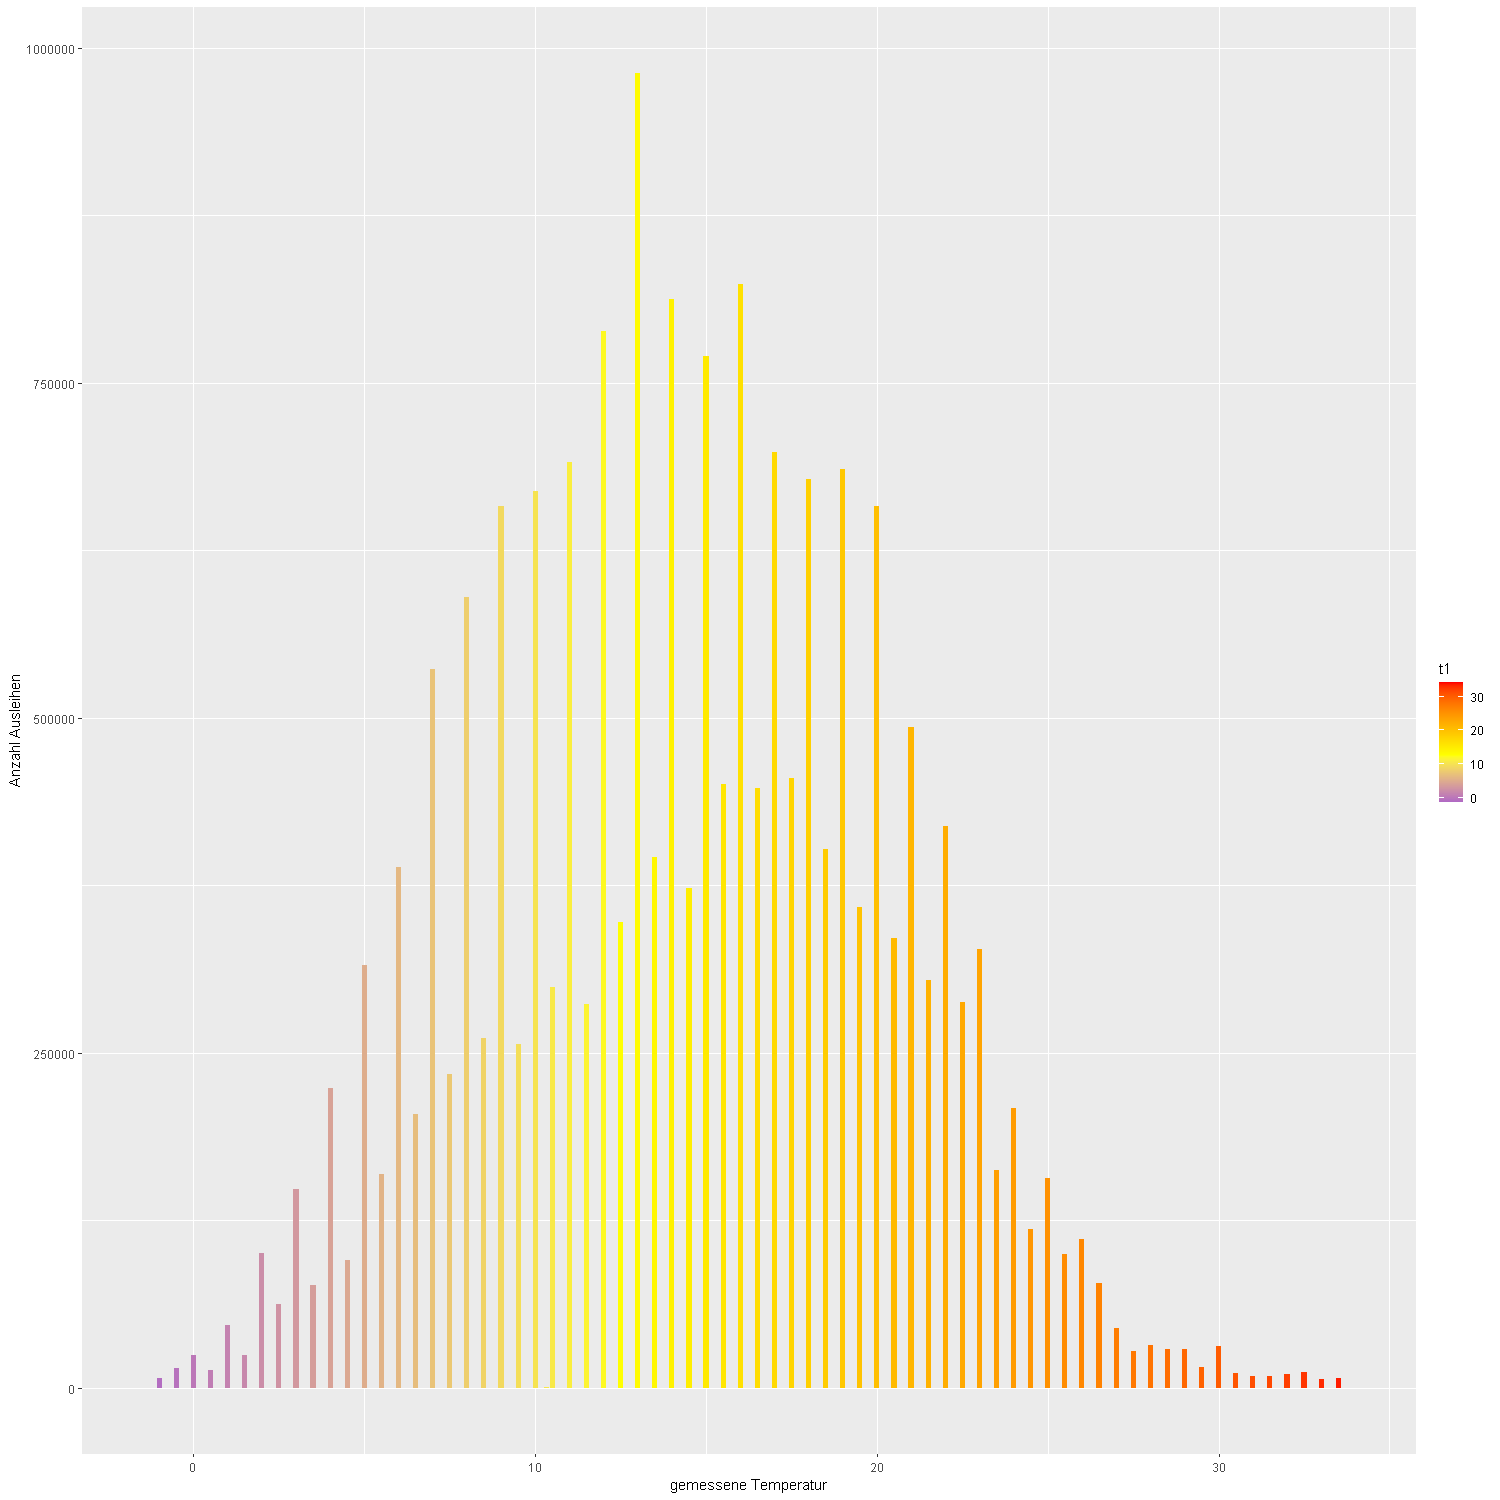

In [80]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(t1, cnt, fill = t1))
# gemäss summary Min t1: -1.5, Max t1: 34, Median t1: 12.5
d + geom_col() + scale_x_continuous(limits=c(-1.5,34)) +
scale_fill_gradient2(
    low = "blue", high = "red",
    mid = "yellow", midpoint=12.5) +
xlab("gemessene Temperatur") +
ylab("Anzahl Ausleihen") 

### Balkendiagramm mit Anzahl Ausleihen und Temperatur (gefühlte Temperatur - t2)

instant,date,time,hr,weekdays,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,04.01.2015,00:00:00,0,Sonntag,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,04.01.2015,01:00:00,1,Sonntag,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,04.01.2015,02:00:00,2,Sonntag,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,04.01.2015,03:00:00,3,Sonntag,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,04.01.2015,04:00:00,4,Sonntag,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,04.01.2015,05:00:00,5,Sonntag,1,46,2.0,2.0,93.0,4.0,1,0,1,3


Warning message:
"Removed 3 rows containing missing values (geom_col)."

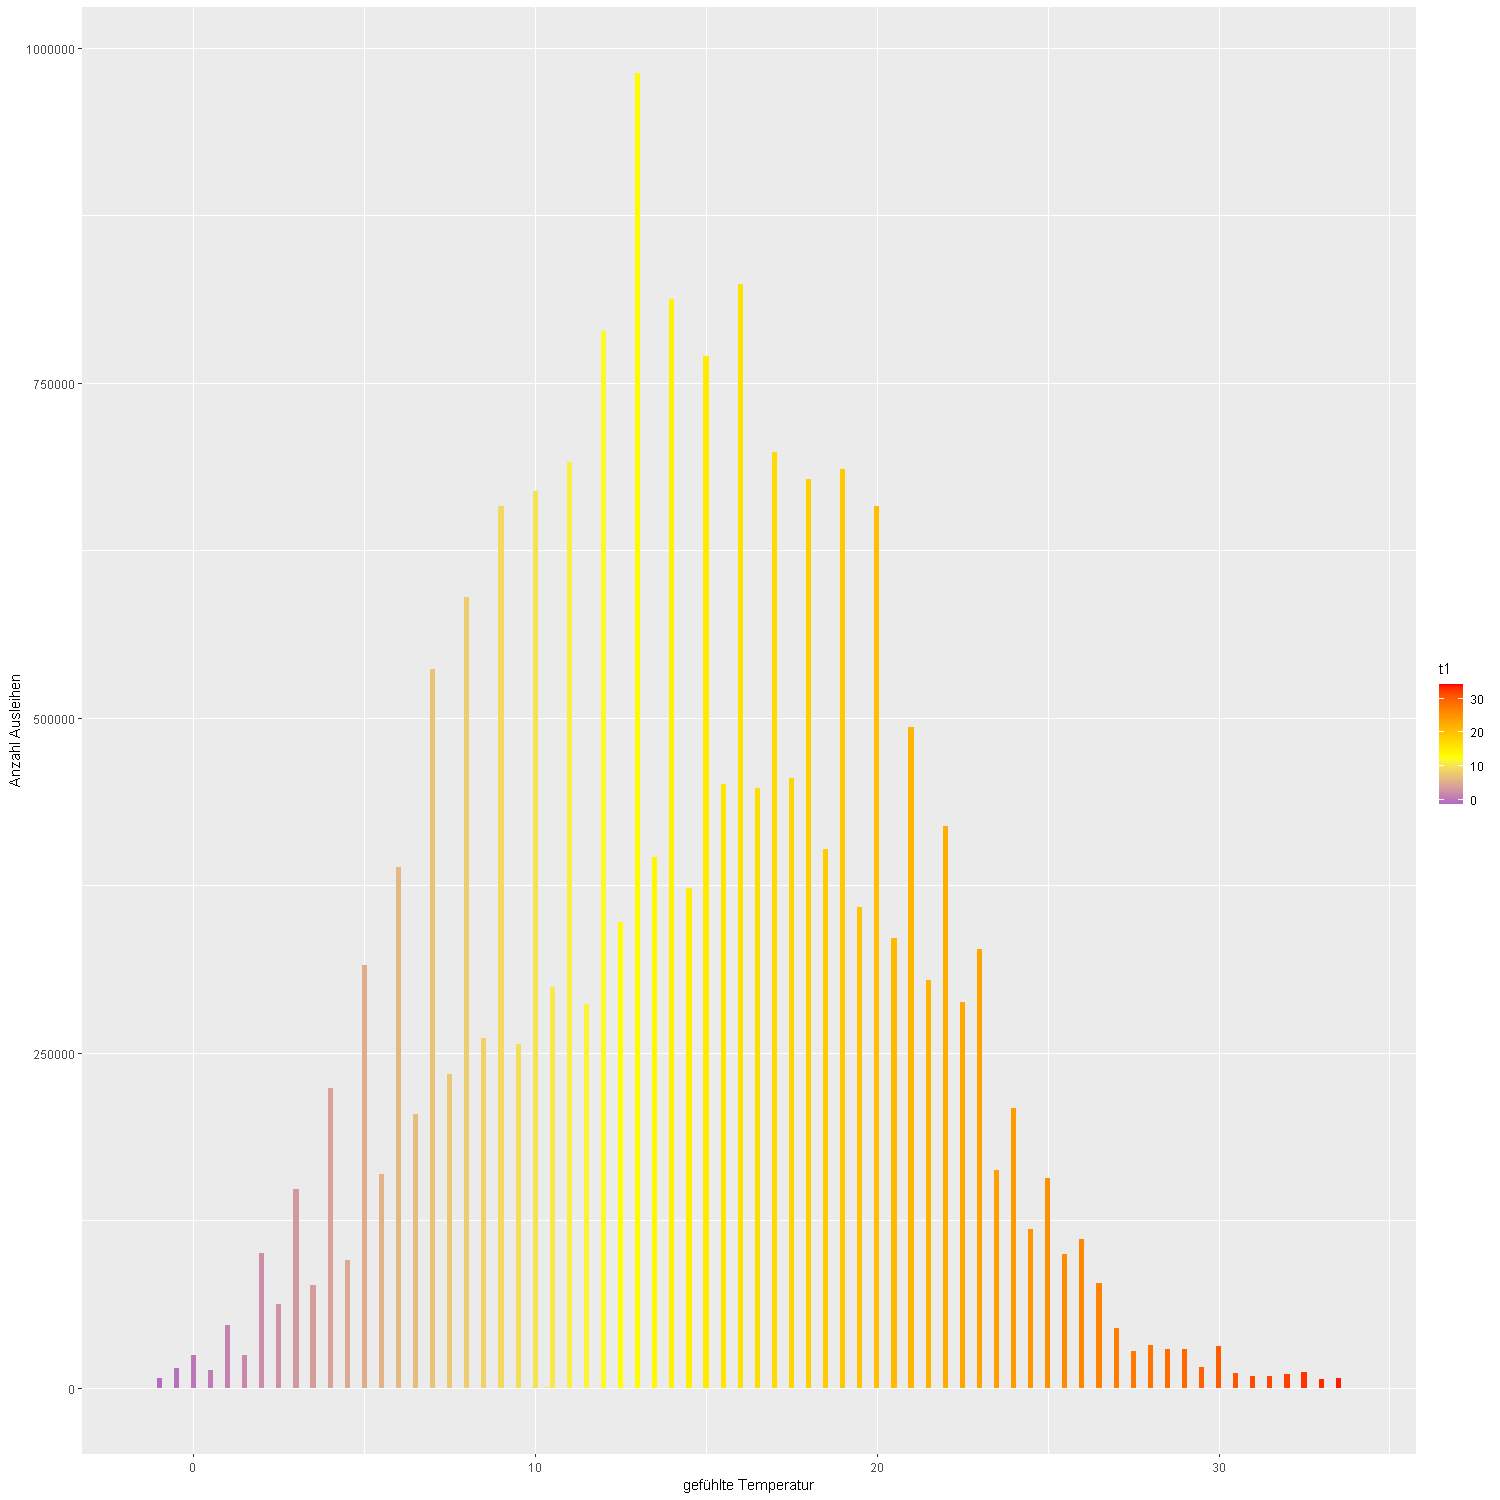

In [81]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(t1, cnt, fill = t1))
# gemäss summary Min t2: -6, Max t2: 34, Median t2: 12.5
d + geom_col() + scale_x_continuous(limits=c(-1.5,34)) +
scale_fill_gradient2(
    low = "blue", high = "red",
    mid = "yellow", midpoint=12.5) + 
xlab("gefühlte Temperatur") +
ylab("Anzahl Ausleihen") 